# Analyzing and Predicting U.S. Flight Delays through Integration of Daily Meteorological Weather Patterns

## Team 6: Emre Can Baykurt, Rinaldo Brendon Patel,Richard O'Keefe, Rashi Jaiswal, Yang Lu

# Abstract

Flight delays remain a major challenge for the U.S. aviation system, generating substantial financial losses, operational inefficiencies, and passenger disruption. This project applies big data analytics and machine learning to analyze and forecast delays using an integrated dataset of over 26 million Bureau of Transportation Statistics flight records (2021–2024) merged with NOAA Global Surface Summary of the Day weather observations. Exploratory analysis examined delay distributions, seasonal and airline-level trends, airport congestion effects, and weather sensitivity. Results indicate that approximately 20% of flights experience delays exceeding 15 minutes, with disruption peaking during summer months and concentrating at high-volume hubs such as ORD and DFW. Poor visibility and high wind speeds emerged as the strongest meteorological predictors, while low-cost carriers exhibited higher delay susceptibility. An XGBoost model (AUC = 0.712) validated the predictive utility of the integrated dataset, demonstrating a scalable framework for weather-aware, data-driven aviation delay forecasting and operational planning.

# Problem Statement 

This project aims to analyze and predict U.S. flight delays by integrating daily meteorological data with airline on-time performance records. The analysis will explore how weather factors such as temperature, wind speed, and precipitation influence flight delays and cancellations. Machine learning models will be developed to classify flights as “on time” or “delayed,” demonstrating how distributed data processing and predictive analytics can improve transportation reliability.


# Executive Summary

The aim of this project is to investigate the root causes and patterns of flight delays within the United States using large-scale operational and meteorological data. The investigation shall emphasize how weather, airline operations, and temporal factors together drive flight punctuality and lay a foundation for predictive modeling. An integrated dataset was generated by combining records of airlines and weather from 2021 to 2024. Using Google Cloud Platform tools, we cleaned, validated, and merged more than twenty-six million flight records with day-by-day weather attributes. Thereafter, such infrastructure allowed performing efficient computation, correlation analysis, and visualization at the national level.

### Objectives

- Large-Scale Data Integration and Preparation: Integrate the BTS Airline On-Time Performance dataset with NOAA's GSOD weather data for 2021–2024 using BigQuery and PySpark to create large-scale, integrated data for analysis.

- Analyze Delay Patterns and Trends: Identify monthly, hourly, and airline-specific delay behaviors, distinguishing between short, long, and weather-related delays.

- Assess weather influence: Quantify the effects of temperature, visibility, wind speed, and other factors like snow, dew, gusts on delay probabilities and frequency.

- Build Predictive Readiness: Establish clean, joined datasets and exploratory insights for machine learning models to predict delays exceeding 15 minutes.

### Key Findings

- Overall Delay Rates: About 20% of flights were delayed more than 15 minutes, and distributions in delay duration show frequent extreme delays beyond 200 minutes.
Temporal and Seasonal Trends: Summer months (June–August) showed the highest average delays and delay frequencies, while fall exhibited the lowest. Hourly trends showed that late-night and early-morning flights face elevated weather-related delays.

- Airline Performance: The low-cost carriers, Frontier F9 and JetBlue B6, had the highest delay rates, while major carriers such as Delta DL and Alaska AS had stronger on-time performance.

- Airport Insights: Major hubs like Dallas–Fort Worth, Chicago O'Hare, and Charlotte showed the highest weather-related delay volumes, pointing out that these airports are sensitive to congestion.

- Weather Correlations: Poorer visibility and higher wind speeds are highly correlated with higher delay rates. Delay rates fell precipitously as visibility improved beyond 10 miles. Inter-variable correlations showed that temperature, precipitation, and visibility were the most important meteorological factors; the operational metrics of carrier, month, and departure hour were the strong secondary predictors.

These results reaffirm that delay behavior is jointly driven by both operational and environmental variables. The following stage will deal with the predictive modeling aspect using machine learning methods to classify and forecast delays exceeding 15 minutes. The more general objective is to create a scalable data-driven framework that would assist airlines and airport authorities in anticipating disruptions, optimizing scheduling, and enhancing passenger reliability through informed, proactive decision-making.

Based on these findings, airlines and airport operators should implement targeted weather-based scheduling buffers at high-risk hub airports during peak summer months, prioritize congestion mitigation strategies during late-night and early-morning operations, and apply real-time monitoring thresholds for wind and visibility to trigger proactive gate, crew, and fleet adjustments. Deployment of the forthcoming machine-learning delay-risk models as decision dashboards will enable day-of-operation risk forecasting to reduce cascading delays and improve passenger reliability.

# 1. Introduction

# 1.1 Motivation

Airlines, airports and regulatory stakeholders systematically lose time and incur higher costs due to unplanned flight delays and cancellations, with weather conditions identified as a key contributing factor. According to recent industry data, weather accounted for approximately 26 % of all arrival delays in the U.S. in the past 12-month period.[1] Yet operational planning often lacks granular, data-driven modelling of how specific meteorological variables (visibility, precipitation, station elevation, wind gusts, etc.) interact with flight operations by airport, carrier, time-of-day and season. 

Our project therefore aims to leverage combined flight-performance data (from Bureau of Transportation Statistics) and weather-station data, to build predictive and diagnostic models of delay risk, enabling stakeholders to quantify “weather-risk” on a flight-by-flight basis and deploy mitigation strategies.[2] The output will empower carriers, airport operations teams, and planners to allocate resources more effectively, adjust schedules proactively, and ultimately improve on-time performance and customer experience.

## Business Relevance

This project holds direct relevance for the aviation industry’s core operational stakeholders — namely, airlines, airport authorities, and national weather agencies. For airlines, weather-induced delays translate into tangible financial losses through increased fuel consumption, crew overtime, and passenger compensation. By quantifying how meteorological variables such as precipitation, visibility, and wind speed contribute to flight disruptions, this analysis enables airlines to anticipate high-risk conditions and optimize scheduling or rerouting decisions. Airport authorities benefit through improved situational awareness, allowing for more efficient gate allocation, runway management, and resource deployment during adverse weather. Finally, weather agencies such as the National Oceanic and Atmospheric Administration (NOAA) and the National Weather Service (NWS) gain actionable feedback on how forecasted conditions affect real-time flight operations — closing the loop between climate data and aviation outcomes, and supporting the development of more operationally responsive weather models.

# 1.2 Data Source

1. The BTS Airline On-Time Performance Dataset (2021–2024) provides flight-level records from U.S. carriers, including scheduled and actual departure/arrival times, delay durations, and categorized delay causes, enabling analysis of operational performance and disruption patterns across airports and seasons.
Weblink: https://www.transtats.bts.gov/DL_SelectFields.aspx?gnoyr_VQ=FGJ&QO_fu146_anzr=b0-gvzr

2. The NOAA Global Surface Summary of the Day (GSOD, 2021–2024) public dataset provides daily weather observations—temperature, pressure, gust, snowdepth, rain, drizzle, wind speed, and precipitation etc.sourced from global stations, mapped to U.S. airports through nearest-station matching for integrated flight–weather analysis.
Weblink: BigQuery public dataset NOAA GSOD

# 1.3 Data Description

| Variable              | Description                                                                    |
| --------------------- | ------------------------------------------------------------------------------ |
| **YEAR**              | Calendar year of flight operation.                                             |
| **QUARTER**           | Calendar quarter (1–4) indicating the period of operation.                     |
| **MONTH**             | Month of the flight.                                                           |
| **DAY_OF_MONTH**      | Day of the month of the flight.                                                |
| **DAY_OF_WEEK**       | Day of the week (1 = Monday, 7 = Sunday).                                      |
| **OP_CARRIER**        | Airline carrier code operating the flight.                                     |
| **ORIGIN_AIRPORT_ID** | Unique airport ID for the departure airport (BTS code).                        |
| **ORIGIN_CITY_NAME**  | City name of the origin airport.                                               |
| **ORIGIN_STATE_ABR**  | Two-letter state abbreviation of origin.                                       |
| **DEST**              | Destination airport code (IATA).                                               |
| **DEST_CITY_NAME**    | City name of the destination airport.                                          |
| **DEST_STATE_ABR**    | Two-letter state abbreviation of destination.                                  |
| **DEP_TIME**          | Actual departure time (local).                                                 |
| **DEP_DELAY**         | Difference between scheduled and actual departure times (minutes).             |
| **DEP_DELAY_NEW**     | Adjusted departure delay (negative values set to 0).                           |
| **ARR_TIME**          | Actual arrival time (local).                                                   |
| **ARR_DELAY**         | Difference between scheduled and actual arrival times (minutes).               |
| **ARR_DELAY_NEW**     | Adjusted arrival delay (negative values set to 0).                             |
| **CANCELLED**         | Indicator (1 = cancelled, 0 = operated).                                       |
| **CANCELLATION_CODE** | Reason code for flight cancellation (A=Carrier, B=Weather, C=NAS, D=Security). |
| **DIVERTED**          | Indicator (1 = diverted, 0 = not diverted).                                    |
| **FLIGHTS**           | Number of flights represented in the record (usually 1).                       |
| **WEATHER_DELAY**     | Delay minutes attributed to weather causes.                                    |
| **distance_km**       | Distance (km) between airport and matched weather station.                     |
| **temp**              | Mean daily air temperature (°C).                                               |
| **dewp**              | Mean daily dew point temperature (°C).                                         |
| **slp**               | Mean sea-level pressure (hPa).                                                 |
| **stp**               | Mean station pressure (hPa).                                                   |
| **visib**             | Average daily visibility (km).                                                 |
| **wdsp**              | Mean wind speed (knots).                                                       |
| **mxpsd**             | Maximum sustained wind speed (knots).                                          |
| **gust**              | Maximum wind gust (knots).                                                     |
| **prcp**              | Total daily precipitation (mm).                                                |
| **sndp**              | Snow depth (mm).                                                               |
| **fog**               | Indicator of fog occurrence (1 = yes, 0 = no).                                 |
| **rain_drizzle**      | Indicator of rain or drizzle (1 = yes, 0 = no).                                |
| **snow_ice_pellets**  | Indicator of snow or ice pellet precipitation (1 = yes, 0 = no).               |
| **hail**              | Indicator of hail occurrence (1 = yes, 0 = no).                                |


# 1.4 Data Import & Table Creation

In [1]:
from pyspark.sql.functions import round, col
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, expr
from pyspark.sql.functions import col, radians, sin, cos, asin, sqrt, lit
from pyspark.sql.window import Window
from pyspark.sql import functions as F
from pyspark.sql.functions import col
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, lpad, when, lit, to_timestamp, concat_ws, expr, min, max, count, round as spark_round, median
from pyspark.sql import types as T
from pyspark.sql.functions import col, when, sum as spark_sum, round as spark_round
import numpy as np 
import pandas as pd
from pyspark.sql.functions import col, sum as spark_sum, when, round as spark_round
from pyspark.sql.functions import col, sum as spark_sum
from pyspark.sql.functions import col, isnan, when, count
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from pyspark.sql.functions import col, mean, count, when, sum as spark_sum
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from pyspark.sql.functions import col, floor, mean, count, sum as spark_sum
from IPython.display import display, HTML
import builtins
from pyspark.sql import Row
from pyspark.sql.functions import skewness, col
from pyspark.sql.functions import skewness, col, lit
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [2]:

spark = SparkSession.builder.appName("CombineFlights2021").getOrCreate()
spark.sparkContext.setLogLevel("ERROR")

25/12/09 16:41:38 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


### Combining all the tables

Extracting individual table months from the flights dataset. The dataset has individual tables for months. Thus we grouped all the tables together for each year and imported each one of them from the bucket where they were initially stored. 

In [2]:
# File paths for all years
paths = [
    "gs://team6flight/data/Flight/2021/*.csv",
    "gs://team6flight/data/Flight/2022/*.csv",
    "gs://team6flight/data/Flight/2023/*.csv",
    "gs://team6flight/data/Flight/2024/*.csv"
]

# Function to load CSVs
def load_csv(path):
    return spark.read.csv(path, header=True, inferSchema=True, mode="PERMISSIVE", escape="")
flights_all = load_csv(paths[0])
for p in paths[1:]:
    flights_all = flights_all.unionByName(load_csv(p))
flights_all.count()

26651502

### Data import from weather dataset

Extracting yearly data through the bigquery table and saving the results on the bucket. The yearly weather data and station mapping data was then imported in the following code blocks.

In [3]:
# Weather file paths
weather_paths = [
    "gs://team6flight/data/Weather/2021/",
    "gs://team6flight/data/Weather/2022/",
    "gs://team6flight/data/Weather/2023/",
    "gs://team6flight/data/Weather/2024/"]
path_stations = "gs://team6flight/data/Weather/stations"

def load_weather(path):
    return spark.read.csv(path, header=True, inferSchema=True, mode="PERMISSIVE" )

# Combine weather datasets
weather_all = load_weather(weather_paths[0])
for p in weather_paths[1:]:
    weather_all = weather_all.unionByName(load_weather(p))
print('The weather row total is: ', weather_all.count())
stations = spark.read.csv(path_stations, header=True, inferSchema=True, mode="PERMISSIVE")
print('The weather row total is: ', stations.count())

The weather row total is:  15991415
The weather row total is:  29590


Subsetting the weather table to only restrict the data for US stations. The main dataset pulls up data from around 95,000 stations all around the world

In [4]:
# Join weather_all with stations to keep only US stations
weather_us = (weather_all.alias("w").join(stations.alias("s"),(col("w.stn") == col("s.usaf")) & (col("w.wban") == col("s.wban")),"inner").filter(col("s.country") == "US")
.select("w.*",col("s.name").alias("station_name"),col("s.country"),col("s.state"),col("s.call").alias("station_call"),col("s.lat").alias("station_lat"),col("s.lon").alias("station_lon"),
col("s.elev").alias("station_elev"),col("s.begin").alias("station_begin"),col("s.end").alias("station_end")))
weather_us.count()

3811196

### Importing the airport data table

For mapping each station name in the weather dataset to the airport city where the airlines have originated and have their destination, we import another dataset which contains information about the airports, their coordinates and similar data

In [5]:
airports = spark.read.csv("gs://team6flight/data/airports/airports.csv",header=True,inferSchema=True)
# Keeping only active and latest airports in the U.S.
airports_clean = (airports.filter((col("AIRPORT_IS_CLOSED") != 1) & (col("AIRPORT_IS_LATEST") == 1)).filter(col("AIRPORT_COUNTRY_CODE_ISO") == "US")
    .select("AIRPORT", "DISPLAY_AIRPORT_NAME", "DISPLAY_AIRPORT_CITY_NAME_FULL","AIRPORT_STATE_CODE", "LATITUDE", "LONGITUDE"))
airports_clean.show(5, truncate=False)

+-------+-----------------------+------------------------------+------------------+-----------+-------------+
|AIRPORT|DISPLAY_AIRPORT_NAME   |DISPLAY_AIRPORT_CITY_NAME_FULL|AIRPORT_STATE_CODE|LATITUDE   |LONGITUDE    |
+-------+-----------------------+------------------------------+------------------+-----------+-------------+
|01A    |Afognak Lake Airport   |Afognak Lake, AK              |AK                |58.10944444|-152.90666667|
|03A    |Bear Creek Mining Strip|Granite Mountain, AK          |AK                |65.54805556|-161.07166667|
|04A    |Lik Mining Camp        |Lik, AK                       |AK                |68.08333333|-163.16666667|
|05A    |Little Squaw Airport   |Little Squaw, AK              |AK                |67.57      |-148.18388889|
|06A    |Kizhuyak Bay           |Kizhuyak, AK                  |AK                |57.74527778|-152.88277778|
+-------+-----------------------+------------------------------+------------------+-----------+-------------+
only showi

## Mapping the airport to the weather stations 

In [6]:
#Earth radius in kilometers
R = 6371.0

airports_coord = airports_clean.select(col("AIRPORT").alias("airport_code"),col("LATITUDE").alias("airport_lat"),col("LONGITUDE").alias("airport_lon"))
stations_coord = weather_us.select(col("stn").alias("station_id"),col("station_name"),col("station_lat"),col("station_lon")).dropDuplicates(["station_id"])
pairs = airports_coord.crossJoin(stations_coord)

#Haversine distance computation
pairs = pairs.withColumn("distance_km",2 * lit(R) * asin(sqrt(sin((radians(col("station_lat")) - radians(col("airport_lat"))) / 2) ** 2 +cos(radians(col("airport_lat"))) *cos(radians(col("station_lat"))) *
sin((radians(col("station_lon")) - radians(col("airport_lon"))) / 2) ** 2)))

#Finding the nearest station for each airport
nearest_station = (pairs.withColumn("rank", F.row_number().over(Window.partitionBy("airport_code").orderBy("distance_km"))).filter(col("rank") == 1).select("airport_code", "station_id", "station_name", "distance_km"))
nearest_station.write.mode("overwrite").parquet("gs://team6flight/data/Mappings/airport_station_mapping/")
nearest_station.orderBy(col("distance_km")).show(10, truncate=False)

+------------+----------+-----------------------------+--------------------+
|airport_code|station_id|station_name                 |distance_km         |
+------------+----------+-----------------------------+--------------------+
|ZZZ         |700260    |W POST-WILL ROGERS MEMORIAL A|NULL                |
|FQL         |744658    |FLORA MUNICIPAL AIRPORT      |0.004823850064681168|
|AXX         |720411    |ANGEL FIRE AIRPORT           |0.006177990124722199|
|AZ7         |A00015    |COLORADO CITY MUNI AIRPORT   |0.009872224990027833|
|UT1         |720565    |HEBER CITY MUNICIPAL AIRPORT |0.011246140534113007|
|MFV         |724026    |ACCOMACK COUNTY AIRPORT      |0.011569957106719592|
|TN3         |720775    |ELLINGTON                    |0.011803355299458125|
|AL7         |720505    |WALKER COUNTY AIRPORT BEVILL |0.011971692227534903|
|SSI         |722137    |MALCOLM MC KINNON AIRPORT    |0.012245884372123931|
|MQY         |723273    |SMYRNA AIRPORT               |0.012354868299353061|

Performing some Final cleaning before the merging of datasets to maintain standardisation and consistency in the variable naming for all the above tables

In [7]:
airport_station_map = spark.read.parquet("gs://team6flight/data/Mappings/airport_station_mapping/")

nearest_station = nearest_station.filter(col("station_id").isNotNull())
flights_all = flights_all.withColumn("YEAR", col("YEAR").cast("int")).withColumn("MONTH", col("MONTH").cast("int")).withColumn("DAY_OF_MONTH", col("DAY_OF_MONTH").cast("int"))
weather_us = weather_us.withColumnRenamed("year", "weather_year").withColumn("weather_year", col("weather_year").cast("int")).withColumn("mo", col("mo").cast("int")).withColumn("da", col("da").cast("int"))

### Final Table Joining Steps

Joining all the tables which we mapped together so that we create a final table for all the airline flights in the US which have weather data mapped to them as well as have proper airport mapping. 

In [8]:
flights_with_station = (flights_all.alias("f").join(airport_station_map.alias("m"),col("f.Origin") == col("m.airport_code"),"left"))
flights_weather = (flights_with_station.alias("f").join(weather_us.alias("w"),(col("f.station_id") == col("w.stn")) &(col("f.YEAR") == col("w.weather_year")) &(col("f.MONTH") == col("w.mo")) &
(col("f.DAY_OF_MONTH") == col("w.da")),"left" ))

flights_weather.select(col("f.Origin").alias("origin"),col("f.YEAR").alias("flight_year"),col("f.MONTH").alias("flight_month"),col("f.DAY_OF_MONTH").alias("flight_day"),col("f.station_id"),
col("f.station_name"),col("w.temp").alias("weather_temp"),col("w.prcp").alias("weather_prcp")).show(3, truncate=False)

+------+-----------+------------+----------+----------+------------------------+------------+------------+
|origin|flight_year|flight_month|flight_day|station_id|station_name            |weather_temp|weather_prcp|
+------+-----------+------------+----------+----------+------------------------+------------+------------+
|ABY   |2021       |1           |1         |722160    |SW GEORGIA REGIONAL ARPT|70.5        |0.1         |
|ABY   |2021       |1           |1         |722160    |SW GEORGIA REGIONAL ARPT|70.5        |0.1         |
|ABY   |2023       |7           |1         |722160    |SW GEORGIA REGIONAL ARPT|84.5        |0.0         |
+------+-----------+------------+----------+----------+------------------------+------------+------------+
only showing top 3 rows



Quick preprocessing before we move forward towards cleaning the new combined data table 

In [9]:
flights_weather = flights_weather.drop('weather_year', 'mo', 'da')
flights_weather = flights_weather.drop('FL_DATE', 'date')
flights_weather = flights_weather.drop('station_begin', 'station_end', 'OP_UNIQUE_CARRIER','OP_CARRIER_AIRLINE_ID' , 'ORIGIN_AIRPORT_SEQ_ID' , 'ORIGIN_CITY_MARKET_ID' , 'DEST_AIRPORT_SEQ_ID' , 'DEST_CITY_MARKET_ID' )
flights_weather = flights_weather.drop('ORIGIN_STATE_FIPS', 'DEST_STATE_FIPS' , 'stn' , 'station_call', 'country')
flights_weather = flights_weather.drop('count_temp', 'count_dewp' , 'count_slp' , 'count_stp' , 'count_visib' , 'count_wdsp' , 'flag_max', 'flag_min' , 'flag_prcp' , 'wban' )
flights_weather = flights_weather.drop('station_name')
flights_weather.write.mode("overwrite").parquet("gs://team6flight/data/Flight/flights_weather/")
flights_weather = spark.read.parquet("gs://team6flight/data/Flight/flights_weather/")
spark.sparkContext.setJobGroup("CombineFlights2021", "Combine Flights 2021 Analysis")
flights_weather = spark.read.parquet("gs://team6flight/data/Flight/flights_weather/")
flights_weather.count()

25/12/09 03:35:52 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


26651502

The columns have both data from BTS as well as Weather related data.

# 2. Data Cleaning

## Import data

In [11]:
#Loading the data from our bucket
spark.sparkContext.setJobGroup("CombineFlights2021", "Combine Flights 2021 Analysis")
spark = SparkSession.builder.appName("CombineFlights2021").getOrCreate()
flights_weather = spark.read.parquet("gs://team6flight/data/Flight/flights_weather/")

## 2.1 Data Inspections: Checking schema, null values and missing data patterns 

The schema of the dataset was reviewed to ensure correct data types. 

In [12]:
# check schema
flights_weather.printSchema()

root
 |-- YEAR: integer (nullable = true)
 |-- QUARTER: integer (nullable = true)
 |-- MONTH: integer (nullable = true)
 |-- DAY_OF_MONTH: integer (nullable = true)
 |-- DAY_OF_WEEK: integer (nullable = true)
 |-- OP_CARRIER: string (nullable = true)
 |-- ORIGIN_AIRPORT_ID: integer (nullable = true)
 |-- ORIGIN: string (nullable = true)
 |-- ORIGIN_CITY_NAME: string (nullable = true)
 |-- ORIGIN_STATE_ABR: string (nullable = true)
 |-- ORIGIN_STATE_NM: string (nullable = true)
 |-- DEST_AIRPORT_ID: integer (nullable = true)
 |-- DEST: string (nullable = true)
 |-- DEST_CITY_NAME: string (nullable = true)
 |-- DEST_STATE_ABR: string (nullable = true)
 |-- DEST_STATE_NM: string (nullable = true)
 |-- DEP_TIME: integer (nullable = true)
 |-- DEP_DELAY: double (nullable = true)
 |-- DEP_DELAY_NEW: double (nullable = true)
 |-- DEP_DEL15: double (nullable = true)
 |-- DEP_DELAY_GROUP: integer (nullable = true)
 |-- ARR_TIME: integer (nullable = true)
 |-- ARR_DELAY: double (nullable = true)

Certain columns, such as Cancelled and Diverted, which function as flags, were converted to integers. 

In [13]:
# Then we inspect table structures, by selecting the major variables of interest
flights_weather.select("DEP_TIME", "ARR_TIME").show(3)

+--------+--------+
|DEP_TIME|ARR_TIME|
+--------+--------+
|    1240|    1431|
|    NULL|    NULL|
|    1357|    1542|
+--------+--------+
only showing top 3 rows



In [14]:
flights_weather.select("CANCELLED", "DIVERTED").show(3)

+---------+--------+
|CANCELLED|DIVERTED|
+---------+--------+
|      0.0|     0.0|
|      1.0|     0.0|
|      0.0|     0.0|
+---------+--------+
only showing top 3 rows



In [15]:
flights_weather.select("DEP_DELAY", "DEP_DELAY_NEW","WEATHER_DELAY","DEP_DEL15").show(3)

+---------+-------------+-------------+---------+
|DEP_DELAY|DEP_DELAY_NEW|WEATHER_DELAY|DEP_DEL15|
+---------+-------------+-------------+---------+
|     -5.0|          0.0|         NULL|      0.0|
|     NULL|         NULL|         NULL|     NULL|
|     65.0|         65.0|          0.0|      1.0|
+---------+-------------+-------------+---------+
only showing top 3 rows



### We then clean these variables: Cancelled, Diverted, Dep_time and Arr_time

Time-based columns like DEP_TIME and ARR_TIME were originally stored as doubles; their formats were changed to strings, and two new timestamp fields—DEP_TIME_STR and ARR_TIME_STR—were created for future use.

In [16]:
# 1. Cast binary flags
flights_weather = (flights_weather.withColumn("CANCELLED", col("CANCELLED").cast("int")).withColumn("DIVERTED", col("DIVERTED").cast("int")))

# 2. Create padded string times
flights_weather = (flights_weather.withColumn("DEP_TIME_STR", lpad(col("DEP_TIME").cast("string"), 4, "0")).withColumn("ARR_TIME_STR", lpad(col("ARR_TIME").cast("string"), 4, "0")))

# 3. Derive hour-of-day
flights_weather = (flights_weather.withColumn("DEP_HOUR",when(col("DEP_TIME").isNotNull(),col("DEP_TIME_STR").substr(1, 2).cast("int")).otherwise(lit(None))).withColumn(
        "ARR_HOUR",when(col("ARR_TIME").isNotNull(),col("ARR_TIME_STR").substr(1, 2).cast("int")).otherwise(lit(None))))

# 4. Build timestamps
flights_weather = (flights_weather.withColumn("DEP_TIMESTAMP",to_timestamp(concat_ws(" ", col("YEAR"), col("MONTH"),col("DAY_OF_MONTH"), col("DEP_TIME_STR")), "y M d HHmm")).withColumn(
        "ARR_TIMESTAMP",to_timestamp(concat_ws(" ", col("YEAR"), col("MONTH"),col("DAY_OF_MONTH"), col("ARR_TIME_STR")), "y M d HHmm")))

Here's what the weather data looks like after cleaning the major variables,we are specifically checking the time related variables and to check the format of Cancelled and Diverted to validate if the operation into integers was applied. 

In [17]:
flights_weather.select("YEAR", "MONTH", "DAY_OF_MONTH","DEP_TIME", "DEP_TIME_STR", "DEP_HOUR", "DEP_TIMESTAMP","ARR_TIME", "ARR_TIME_STR", "ARR_HOUR", "ARR_TIMESTAMP","CANCELLED", "DIVERTED").show(2, truncate=False)

+----+-----+------------+--------+------------+--------+-------------------+--------+------------+--------+-------------------+---------+--------+
|YEAR|MONTH|DAY_OF_MONTH|DEP_TIME|DEP_TIME_STR|DEP_HOUR|DEP_TIMESTAMP      |ARR_TIME|ARR_TIME_STR|ARR_HOUR|ARR_TIMESTAMP      |CANCELLED|DIVERTED|
+----+-----+------------+--------+------------+--------+-------------------+--------+------------+--------+-------------------+---------+--------+
|2021|1    |22          |1240    |1240        |12      |2021-01-22 12:40:00|1431    |1431        |14      |2021-01-22 14:31:00|0        |0       |
|2021|3    |29          |NULL    |NULL        |NULL    |NULL               |NULL    |NULL        |NULL    |NULL               |1        |0       |
+----+-----+------------+--------+------------+--------+-------------------+--------+------------+--------+-------------------+---------+--------+
only showing top 2 rows



### Checking for null & missing values

In [18]:
null_counts_df = flights_weather.select([spark_sum(col(c).isNull().cast("int")).alias(c) for c in flights_weather.columns])

# Convert from wide → long format (Column, Null_Count)
null_counts_long = null_counts_df.selectExpr("stack({0}, {1}) as (Column, Null_Count)".format(len(flights_weather.columns),",".join([f"'{c}', {c}" for c in flights_weather.columns])))

# Compute null percentage and sort descending
total_rows = flights_weather.count()
null_counts_long = (null_counts_long.withColumn("Null_%", spark_round((col("Null_Count") / total_rows) * 100, 2)).orderBy(col("Null_%").desc()))

# Display columns with >50% null values
null_counts_long.filter(col("Null_%") > 50).show(truncate=False)

+-----------------+----------+------+
|Column           |Null_Count|Null_%|
+-----------------+----------+------+
|CANCELLATION_CODE|26182898  |98.24 |
|WEATHER_DELAY    |21427705  |80.4  |
+-----------------+----------+------+



We wanted to check the cancellation code unique values

In [ ]:
# Inspect cancellation code
flights_weather.select("CANCELLATION_CODE") \
    .where(col("CANCELLATION_CODE").isNotNull()) \
    .distinct() \
    .orderBy("CANCELLATION_CODE") \
    .show(truncate=False)

Results: A crosswalk of the cancellation codes:

A Carrier – Airline‐related issue (maintenance, crew, etc.) B Weather – Bad weather conditions C National Air System – Air traffic control, system issues D Security – e.g., threat, screening delay

Because of printing issues, we only printed those columns which had more than 50% of null values and it revealed that CancellationCode and WeatherDelay contained more than 50% nulls. The format of WeatherDelay was standardized to integer.

In [19]:
# Inspect weather delay
flights_weather.select("WEATHER_DELAY").where(col("WEATHER_DELAY").isNotNull()).distinct().orderBy("WEATHER_DELAY").show(3, truncate=False)

+-------------+
|WEATHER_DELAY|
+-------------+
|0.0          |
|1.0          |
|2.0          |
+-------------+
only showing top 3 rows



We see the unique values are in minutes; therefore it makes sense to create dummies of weather delay of 0 minutes and larger than 0 minutes and looked for any systematic missing data patterns in Has weather delay column. 

In [20]:
# # weather delay was in 'double format' converted that to 'Integer' format type
flights_weather = flights_weather.withColumn("WEATHER_DELAY", col("WEATHER_DELAY").cast("int"))
flights_weather.select("WEATHER_DELAY").printSchema()
# Then create a 0/1 variable to indicate weather delay
flights_weather = flights_weather.withColumn("HAS_WEATHER_DELAY",when(col("WEATHER_DELAY").isNotNull() & (col("WEATHER_DELAY") > 0), 1).otherwise(0))
df = flights_weather.withColumn("miss_wdelay", F.col("WEATHER_DELAY").isNull().cast("int"))
df.groupBy("YEAR","MONTH").agg(F.avg("miss_wdelay").alias("miss_rate")).orderBy("YEAR","MONTH").show(3)
df.groupBy("OP_CARRIER").agg(F.avg("miss_wdelay").alias("miss_rate"), F.count("*").alias("n")).orderBy(F.desc("miss_rate")).show(2)
df.groupBy((F.col("DEP_DELAY")>0).cast("int").alias("is_delayed")).agg(F.avg("miss_wdelay").alias("miss_rate")).show()

root
 |-- WEATHER_DELAY: integer (nullable = true)



+----+-----+------------------+
|YEAR|MONTH|         miss_rate|
+----+-----+------------------+
|2021|    1|0.9032698075411977|
|2021|    2|0.8628649975335972|
|2021|    3|0.8995626310531952|
+----+-----+------------------+
only showing top 3 rows



+----------+------------------+------+
|OP_CARRIER|         miss_rate|     n|
+----------+------------------+------+
|        9E|0.8695805753246018|900257|
|        QX|0.8568898158358239|200419|
+----------+------------------+------+
only showing top 2 rows



+----------+------------------+
|is_delayed|         miss_rate|
+----------+------------------+
|      NULL|               1.0|
|         1|0.5200439724676225|
|         0|0.9661114774174137|
+----------+------------------+



We do not see systematic patterns in missingness, except for the last table, which shows the missing pattern by departure delay status. This makes perfect sense: for flights without delay, we do not expect a value entered for any flight delay reasons. We therefore fill out the NA safely with a value 0. 

In [21]:
flights_weather_copy = flights_weather
flights_weather_copy = flights_weather_copy.fillna({'WEATHER_DELAY': 0})

Next, the formats of several weather-related variables—such as Distance_km, sndp, wdnsp, min, max, gust, and others—were examined. Minimum and maximum values were checked for outliers and abnormal readings. It was observed that the weather data contained placeholder values (e.g., 99) representing missing data in various formats. These were treated as missing and imputed using appropriate strategies per variable.

In [22]:
weather_cols = [
    "airport_code", "station_id", "distance_km",
    "temp", "dewp", "slp", "stp",
    "visib", "wdsp", "mxpsd", "gust",
    "max", "min", "prcp", "sndp",
    "fog", "rain_drizzle", "snow_ice_pellets",
    "hail", "thunder", "tornado_funnel_cloud",
    "state", "station_lat", "station_lon", "station_elev"
]
def show_in_batches(df, columns, batch_size=4, n_rows=3):
    batches = [columns[i:i+batch_size] for i in range(0, len(columns), batch_size)]
    
    for i, subset in enumerate(batches, 1):
        print(f"\nBatch {i}: {subset}")
        df.select(*subset).limit(n_rows).toPandas()

From the inspection tables, we see that some columns like SNDP and Gust have 999.9 values.

SNDP: Most stations do not report '0' on days with no snow on the ground--therefore, '999.9' will often appear on these days.

Let's look at the min max values for these columns then we can take a call to transform values. We will also look at rows in 'gust' and 'sndp' to check how many rows have 999.9 value as 999.9 is the missing value for these two variables.From the inspection tables, we see that some columns like SNDP and Gust have 999.9 values.

In [23]:
total_rows = flights_weather_copy.count()
print(f"Total rows in dataset: {total_rows:,}")
sentinel_cols = ["gust", "sndp"]
# Compute counts of sentinel (999.9) values
sentinel_counts = flights_weather_copy.select([
    spark_sum(when(col(c) == 999.9, 1).otherwise(0)).alias(c)
    for c in sentinel_cols
]).collect()[0].asDict()
print("=== Sentinel Value Report (999.9) ===")
for c, count in sentinel_counts.items():
    pct = (count / total_rows) * 100
    print(f"{c}: {count:,} rows ({pct:.2f}% of total)")

Total rows in dataset: 26,651,502


=== Sentinel Value Report (999.9) ===
gust: 9,684,298 rows (36.34% of total)
sndp: 25,739,777 rows (96.58% of total)


We can impute 0 in place of missing value in "sndp" and keep "gust" in the final dataset.

Then we look at min and max values of these columns - numeric columns in weather cols

In [24]:
numeric_cols = ["distance_km", "temp", "dewp", "slp", "stp","visib", "wdsp", "mxpsd", "gust","max", "min", "prcp", "sndp"]

summary_df = flights_weather_copy.select(*numeric_cols).describe()
min_max_df = summary_df.filter((col("summary") == "min") | (col("summary") == "max"))
batch_size = 4
for i in range(0, len(numeric_cols), batch_size):
    subset = numeric_cols[i:i + batch_size]
    print(f"\n== Min/Max for {subset} ==")
    pdf = (
        min_max_df
        .select(["summary"] + subset)
        .toPandas()
    )
    print(pdf.to_string(index=False))


== Min/Max for ['distance_km', 'temp', 'dewp', 'slp'] ==


summary          distance_km  temp   dewp    slp
    min 0.014757085713973911 -47.3  -40.0  962.2
    max   5074.5576168790885 107.9 9999.9 9999.9

== Min/Max for ['stp', 'visib', 'wdsp', 'mxpsd'] ==


summary   stp visib  wdsp mxpsd
    min   0.0   0.0   0.0   2.9
    max 999.9 999.9 999.9 999.9

== Min/Max for ['gust', 'max', 'min', 'prcp'] ==


summary  gust    max    min  prcp
    min   9.9  -43.6  -54.0   0.0
    max 999.9 9999.9 9999.9 99.99

== Min/Max for ['sndp'] ==


summary  sndp
    min   0.4
    max 999.9


### Observations and notes about the different missing values observed in the weather dataset:
Observations and notes about the different missing values observed in the weather dataset:
In the NOAA GSOD dataset, different variables use specific placeholder codes to indicate missing values. Variables such as MXSPD (maximum sustained wind speed), WDSP (mean wind speed), and VISIB (mean visibility) use 999.9 to denote missing data, reflecting their measurement in tenths (e.g., knots or miles). 
In contrast, variables like MAX and MIN (maximum and minimum temperatures), STP (station pressure), SLP (sea level pressure), DEWP (dew point), and TEMP (mean temperature) use 9999.9 as the missing value code due to their higher precision or scale (e.g., temperatures and pressures in tenths). 
A special case is PRCP (precipitation), which uses 99.99 to denote missing values; notably, this can also appear on days with no recorded rainfall, since many stations do not report zeros explicitly—making it important to distinguish between true missing values and implicit “no precipitation” days during data cleaning.


We look into the numeric columns and see the missingness in these columns.

In [25]:
# Dictionary of NOAA-style sentinel values
sentinel_values = {"temp": 9999.9,"dewp": 9999.9,"slp": 9999.9,"stp": 9999.9,"visib": 999.9,"wdsp": 999.9,"mxpsd": 999.9,"gust": 999.9,"max": 9999.9,"min": 9999.9,"prcp": 99.99,"sndp": 999.9   }

In [26]:
total_rows = flights_weather_copy.count()
results = []
for var, sentinel in sentinel_values.items():
    if sentinel is not None:
        null_count = flights_weather_copy.filter(col(var) == sentinel).count()
        null_pct = (null_count / total_rows) * 100
        results.append((var, sentinel, null_count, round(null_pct, 2)))
missing_summary = spark.createDataFrame(
    results,
    ["Variable", "Sentinel_Value", "Missing_Count", "Missing_%"]
)
missing_summary.orderBy(col("Missing_%").desc()).show(truncate=False)

+--------+--------------+-------------+---------+
|Variable|Sentinel_Value|Missing_Count|Missing_%|
+--------+--------------+-------------+---------+
|sndp    |999.9         |25739777     |96.58    |
|gust    |999.9         |9684298      |36.34    |
|slp     |9999.9        |160108       |0.6      |
|prcp    |99.99         |50961        |0.19     |
|max     |9999.9        |10159        |0.04     |
|mxpsd   |999.9         |4527         |0.02     |
|dewp    |9999.9        |1430         |0.01     |
|min     |9999.9        |1816         |0.01     |
|temp    |9999.9        |0            |0.0      |
|stp     |9999.9        |0            |0.0      |
|visib   |999.9         |518          |0.0      |
|wdsp    |999.9         |386          |0.0      |
+--------+--------------+-------------+---------+



Result: We can see that sndp and gust have a lot of missing values in the weather dataset. 

In [ ]:
# transforming distance_km- rounding up the values upto 2 decimals places, 

flights_weather_copy = flights_weather_copy.withColumn("distance_km_clean",round(col("distance_km"), 2))

### Data Imputation

Since some columns have more than 90% missing values, we need to impute them to ensure data completeness. Specifically, we use a hierarchical approach: first replacing sentinel values like 999.9 with zeros where appropriate, then filling other missing entries with group-based medians using Spark window functions, and finally applying global median values as a fallback for any remaining gaps. The Distance_km column was standardized to two decimal places for consistency.

In [28]:
SENTINELS = {"sndp": 999.9, "prcp": 99.99, "gust": 999.9, "slp": 9999.9, "stp": 9999.9,"max": 9999.9, "min": 9999.9, "dewp": 9999.9, "visib": 999.9, "wdsp": 999.9,"mxpsd": 999.9, "temp": 9999.9}

# 1. Temporal & Geographical Window: 
temp_window = Window.partitionBy("station_id", "MONTH")
station_window = Window.partitionBy("station_id")

# Category 1: Conditional Zero Imputation , sndp (No Snow) and prcp (No Precipitation) are imputed with 0.0.
flights_weather_copy = flights_weather_copy.withColumn("sndp_CLEAN",when(col("sndp") == SENTINELS["sndp"], 0.0).otherwise(col("sndp"))).withColumn("prcp_CLEAN",when(col("prcp") == SENTINELS["prcp"], 0.0).otherwise(col("prcp")))
# Category 2: Median Imputation by Group 
group_impute_config = {"temp": {"window": temp_window}, "dewp": {"window": temp_window},"max": {"window": temp_window}, "min": {"window": temp_window},
    "slp": {"window": station_window}, "stp": {"window": station_window},"gust": {"window": station_window}, "wdsp": {"window": station_window},"mxpsd": {"window": station_window}, "visib": {"window": station_window},}

for c, config in group_impute_config.items():
    sentinel = SENTINELS[c]
    
    #Calculate the Group Median
    flights_weather_copy =flights_weather_copy.withColumn(
        f"{c}_IMPUTE_VAL",
        median(
            when(col(c) != sentinel, col(c))
        ).over(config["window"])
    )
    
    #Apply Imputation
    flights_weather_copy = flights_weather_copy.withColumn(
        f"{c}_CLEAN",when((col(c).isNull()) | (col(c) == sentinel),col(f"{c}_IMPUTE_VAL")).otherwise(col(c))).drop(f"{c}_IMPUTE_VAL") 
    
# Final Fallback Imputation 
final_clean_cols = [f"{c}_CLEAN" for c in SENTINELS.keys()]
# Calculate global medians 
global_medians = {
    c: flights_weather_copy.approxQuantile(c, [0.5], 0.01)[0]
    for c in final_clean_cols
    if c in flights_weather_copy.columns
}
# Apply imputation
for c_clean, global_median in global_medians.items():
    flights_weather_copy = flights_weather_copy.fillna(global_median, subset=[c_clean])
flights_weather_copy.select(*final_clean_cols, "station_id", "MONTH").show(3)

+----------+----------+----------+---------+---------+---------+---------+----------+-----------+----------+-----------+----------+----------+-----+
|sndp_CLEAN|prcp_CLEAN|gust_CLEAN|slp_CLEAN|stp_CLEAN|max_CLEAN|min_CLEAN|dewp_CLEAN|visib_CLEAN|wdsp_CLEAN|mxpsd_CLEAN|temp_CLEAN|station_id|MONTH|
+----------+----------+----------+---------+---------+---------+---------+----------+-----------+----------+-----------+----------+----------+-----+
|       0.0|       0.2|      39.0|   1002.3|      1.6|     27.0|     10.9|      16.1|        2.5|      26.0|       32.1|      18.2|    701330|    4|
|       0.0|       0.0|      29.9|   1010.2|      9.6|     46.0|     30.0|      28.9|       10.0|       7.3|       15.0|      36.2|    701330|    4|
|       0.0|       0.0|      29.9|   1010.2|      9.6|     46.0|     30.0|      28.9|       10.0|       7.3|       15.0|      36.2|    701330|    4|
+----------+----------+----------+---------+---------+---------+---------+----------+-----------+---------

More data cleaning was performed, variable of interest which is DepDelay15 for null values.

We wanted to check the of the null rows in Depdelay15 how many are cancelled, to check if delayed flights were indeed cancelled, diverted.
We also wanted to check whether any of the null values in Depdelay15 meant that these were not cancelled or not diverted.

In [29]:
flights_weather_copy.groupBy(col("DEP_DEL15")).count().show()
null_count = flights_weather_copy.filter(col("DEP_DEL15").isNull()).count()
print("NULL count:", null_count)

null_and_cancelled = (flights_weather_copy.filter(col("DEP_DEL15").isNull() & (col("CANCELLED") == 1)).count())

print("NULL DEP_DEL15 AND CANCELLED = 1:", null_and_cancelled)
from pyspark.sql.functions import col

# Of all NULL rows in DEP_DEL15, how many are diverted?
null_and_diverted = (flights_weather_copy.filter(col("DEP_DEL15").isNull() & (col("DIVERTED") == 1)).count())
print("NULL DEP_DEL15 AND DIVERTED = 1:", null_and_diverted)
null_neither = (flights_weather_copy.filter(col("DEP_DEL15").isNull() &(col("CANCELLED") == 0) &(col("DIVERTED") == 0)).count())
print("NULL DEP_DEL15 but NOT cancelled/diverted:", null_neither)

+---------+--------+
|DEP_DEL15|   count|
+---------+--------+
|     NULL|  455591|
|      1.0| 5254473|
|      0.0|20941438|
+---------+--------+



NULL count: 455591


NULL DEP_DEL15 AND CANCELLED = 1: 455591


NULL DEP_DEL15 AND DIVERTED = 1: 0


NULL DEP_DEL15 but NOT cancelled/diverted: 0


Results: We can see that most of the Depdelay15 flights which had null values were indeed Cancelled flights.

Check for null values in categorical variables in the weather dataset

In [30]:
binary_cols = [
    'fog',
    'rain_drizzle',
    'snow_ice_pellets',
    'hail',
    'thunder',
    'tornado_funnel_cloud'
]

for c in binary_cols:
    print(f"\n=== {c} ===")
    flights_weather_copy.groupBy(col(c)).count().show()
    
    # Count NULLs explicitly
    nulls = flights_weather_copy.filter(col(c).isNull()).count()
    print(f"nulls = {nulls}")


=== fog ===


+----+--------+
| fog|   count|
+----+--------+
|NULL|   17189|
|   1| 1571401|
|   0|25062912|
+----+--------+



nulls = 17189

=== rain_drizzle ===


+------------+--------+
|rain_drizzle|   count|
+------------+--------+
|        NULL|   17189|
|           1| 8864909|
|           0|17769404|
+------------+--------+



nulls = 17189

=== snow_ice_pellets ===


+----------------+--------+
|snow_ice_pellets|   count|
+----------------+--------+
|            NULL|   17189|
|               1| 1219176|
|               0|25415137|
+----------------+--------+



nulls = 17189

=== hail ===


+----+--------+
|hail|   count|
+----+--------+
|NULL|   17189|
|   1|   55641|
|   0|26578672|
+----+--------+



nulls = 17189

=== thunder ===


+-------+--------+
|thunder|   count|
+-------+--------+
|   NULL|   17189|
|      1| 2887154|
|      0|23747159|
+-------+--------+



nulls = 17189

=== tornado_funnel_cloud ===


+--------------------+--------+
|tornado_funnel_cloud|   count|
+--------------------+--------+
|                NULL|   17189|
|                   1|    6726|
|                   0|26627587|
+--------------------+--------+



nulls = 17189


Result of null checks: The weather flag variables originate from the GSOD FRSHTT field, where each digit indicates the presence (1) or absence (0) of a specific weather phenomenon. 
When FRSHTT is missing, NOAA convention implies that no special weather events occurred; therefore, null values are correctly imputed as 0.

Then, we wanted to check whether these 17189 missings are systematic:

In [31]:
TARGET_COL = "tornado_funnel_cloud" 
# Select only rows where tornado funnel is missing
missing_tf = flights_weather_copy.filter(F.col(TARGET_COL).isNull())
missing_tf_count = missing_tf.count()
print(f"\nMissing {TARGET_COL} count:", missing_tf_count)

# Missingness Summary
missing_counts = [
    F.sum(F.col(c).isNull().cast("int")).alias(c)
    for c in flights_weather_copy.columns
]
missing_df = missing_tf.select(missing_counts)
print("\nMissingness counts for rows where the categorical variables is missing:")
missing_df.show(truncate=False)

TARGET_COL = "tornado_funnel_cloud"
MISSING_COUNT = 17189 
missing_tf = flights_weather_copy.filter(F.col(TARGET_COL).isNull())

# Compute missingness for every column
missing_counts = missing_tf.select([
F.sum(F.col(c).isNull().cast("int")).alias(c)
    for c in flights_weather_copy.columns
]).collect()[0].asDict()

systematically_missing_cols = [col for col, count in missing_counts.items() if count == MISSING_COUNT]
print("Columns with exactly 17,189 missing values:")
for c in systematically_missing_cols:
    print(c)


Missing tornado_funnel_cloud count: 17189

Missingness counts for rows where the categorical variables is missing:


+----+-------+-----+------------+-----------+----------+-----------------+------+----------------+----------------+---------------+---------------+----+--------------+--------------+-------------+--------+---------+-------------+---------+---------------+--------+---------+-------------+---------+---------------+---------+-----------------+--------+----------------+-------------------+-------+-------------+------------+----------+-----------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+------------+----------------+-----+-------+--------------------+-----+-----------+-----------+------------+------------+------------+--------+--------+-------------+-------------+-----------------+-----------------+----------+----------+----------+----------+---------+---------+---------+---------+----------+----------+-----------+-----------+
|YEAR|QUARTER|MONTH|DAY_OF_MONTH|DAY_OF_WEEK|OP_CARRIER|ORIGIN_AIRPORT_ID|ORIGIN|ORIGIN_CITY_NAME|ORIGIN_STATE_ABR|ORIGIN_STATE_N

Columns with exactly 17,189 missing values:
temp
dewp
slp
stp
visib
wdsp
mxpsd
gust
max
min
prcp
sndp
fog
rain_drizzle
snow_ice_pellets
hail
thunder
tornado_funnel_cloud
state
station_lat
station_lon
station_elev


Results: It's because those observations are not linked to a proper weather station. 

We decided to remove those rows which had missing data 

In [32]:
clean_df = flights_weather_copy
#Drop rows where any binary column has a NULL value
clean_df = clean_df.dropna(subset=binary_cols)
original_count = flights_weather_copy.count()
clean_count = clean_df.count()
missing = original_count - clean_count
print("Rows removed:", missing)
if missing == 17189:
    print("Missing count matches 17189")
else:
    print(f"Missing count does NOT match 17189 (got {missing})")

Rows removed: 17189
Missing count matches 17189


We wanted to check if the imputation was successful 

In [33]:

flights_weather_copy = clean_df
binary_cols = [
    'fog',
    'rain_drizzle',
    'snow_ice_pellets',
    'hail',
    'thunder',
    'tornado_funnel_cloud'
]

# Show null counts for each column
flights_weather_copy.select([
    spark_sum(col(c).isNull().cast("int")).alias(f"{c}_nulls")
    for c in binary_cols
]).show(truncate=False)

+---------+------------------+----------------------+----------+-------------+--------------------------+
|fog_nulls|rain_drizzle_nulls|snow_ice_pellets_nulls|hail_nulls|thunder_nulls|tornado_funnel_cloud_nulls|
+---------+------------------+----------------------+----------+-------------+--------------------------+
|0        |0                 |0                     |0         |0            |0                         |
+---------+------------------+----------------------+----------+-------------+--------------------------+



Checking if weather_delay since this is a potential target variable for us, needed to check if it has nulls values

In [34]:
flights_weather_copy.select(count(when(col("WEATHER_DELAY").isNull(), 1)).alias("null_weather_delay")).show()

+------------------+
|null_weather_delay|
+------------------+
|                 0|
+------------------+



Result: There were 0 Nulls in Weather delay

## 2.3 Final column cleaning and inspections

Finally, redundant or low-utility columns such as sndp, prcp, and Distance_km were dropped from the dataset.

In [35]:
# dropping columns and save a running copy
flights_weather_copy = flights_weather_copy.drop("distance_km","sndp","prcp")
flights_weather_copy.write.mode("overwrite").parquet("gs://team6flight/data/Flight/flights_weather_cleaned/")
check_cleaned = spark.read.parquet("gs://team6flight/data/Flight/flights_weather_cleaned/")
check_cleaned.count()

26634313

E1) How does the national flight delay rate fluctuate over time, and what large-scale patterns or disruptions shape the reliability of the U.S. air transportation system? ( 12month rolling window line chart) 
E2) How does the weather based delay look across the entirity of US. ( US MAP heatmap )
E3) What is the Delay duration distribution with and without bad weather ? ( KDE plot ) 
E4) How do different U.S. airlines’ delay rates change as weather severity increases? ( Heatmap )
E5) Do airlines that experience more delays also cancel flights more frequently? ( Bubble Chart ) 
E6) How do wind speed and visibility interact to influence the probability that a flight is delayed more than 15 minutes? ( Heatmap)
E7) Which airlines show the highest operational unpredictability based on daily delay fluctuations? ( Box Plot )
E8) How do different categories of extreme weather affect the distribution and severity of U.S. airport departure delays? ( Violin Chart )
E9) How do major U.S. airports differ in their sensitivity to key operational delay drivers such as weather, congestion, propagation, and visibility? (radar chart )
E10) How does temperature, wind speed & visibility affect delays ? (scatter plot with regression line ) 
E11) Which airlines see the most weather-related delays and how does each airline differ from each other ? (diverging bar chart)
E12) Which airports have the highest share of weather-related delays? (Lollipop bar chart )
E13) How does weather delay pattern look like throughout day in the year ? ( heatmap ) 
E14) How do average departure and arrival delays vary across months and seasons from 2021–2024? ( bar and line together ) 
E15) Which flights were delayed more than 4 hours ? ( Distribution ) 

# 3. Exploratory Data Analysis 

# Q1) How does the national flight delay rate fluctuate over time, and what large-scale patterns or disruptions shape the reliability of the U.S. air transportation system?

25/12/09 04:01:55 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/12/09 04:01:55 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/12/09 04:01:55 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/12/09 04:02:16 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/12/09 04:02:16 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/12/09 04:02:16 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/12/09 0

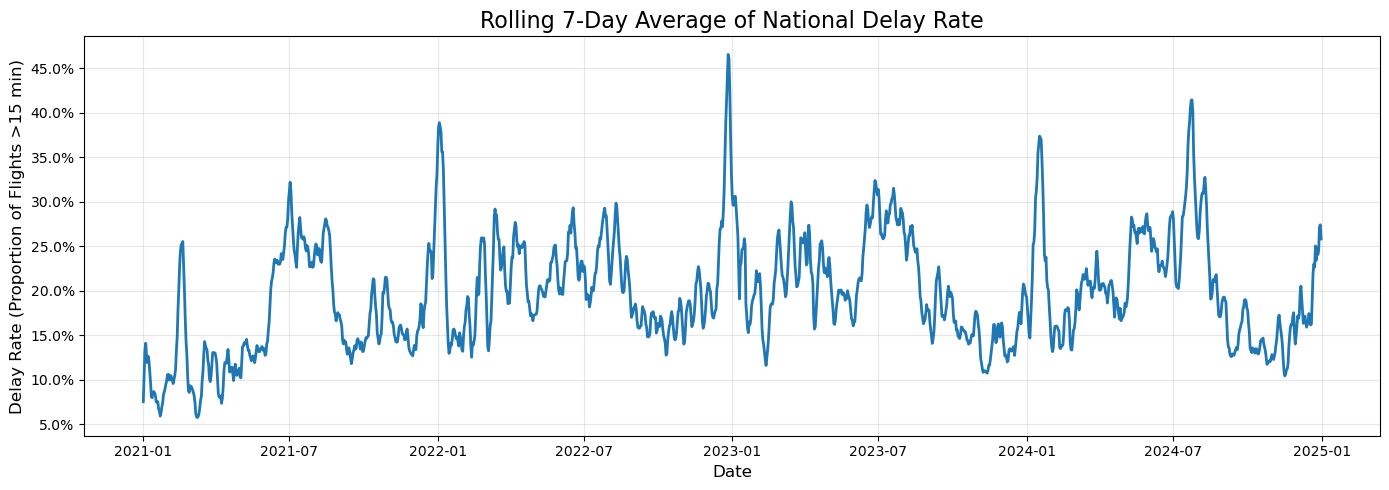

In [36]:
df = flights_weather_copy.withColumn("FL_DATE",F.to_date("DEP_TIMESTAMP"))
#Compute daily delay rate (arrival delays >15 min)
daily_delay = (df.groupBy("FL_DATE").agg((F.sum("ARR_DEL15") / F.count("*")).alias("daily_delay_rate")).orderBy("FL_DATE"))

# 3. Rolling 7-day average
w = Window.orderBy("FL_DATE").rowsBetween(-6, 0)
rolling_delay = daily_delay.withColumn("rolling_7day_delay_rate",F.avg("daily_delay_rate").over(w))
rolling_pd = rolling_delay.toPandas()
plt.figure(figsize=(14, 5))
plt.plot(rolling_pd["FL_DATE"],rolling_pd["rolling_7day_delay_rate"],linewidth=2,)
plt.title("Rolling 7-Day Average of National Delay Rate", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Delay Rate (Proportion of Flights >15 min)", fontsize=12)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

The rolling 7-day national delay rate reveals the broad operational rhythm of the U.S. air transportation system. By smoothing daily volatility, the visualization highlights persistent seasonal behaviors—winter weather, summer convection, and major holiday travel periods—as well as sharp disruption spikes that briefly elevate delay rates nationwide. These recurring peaks and troughs demonstrate that delays are not random events but follow predictable, system-level patterns driven by climate cycles, demand surges, and capacity constraints. This perspective provides critical context for interpreting airport-level and airline-level results: individual spikes or improvements can only be understood relative to the national baseline illustrated here. Overall, the graph establishes the macro environment in which all subsequent analyses operate, confirming both the temporal realism of the dataset and the structural forces influencing delay formation across the network.

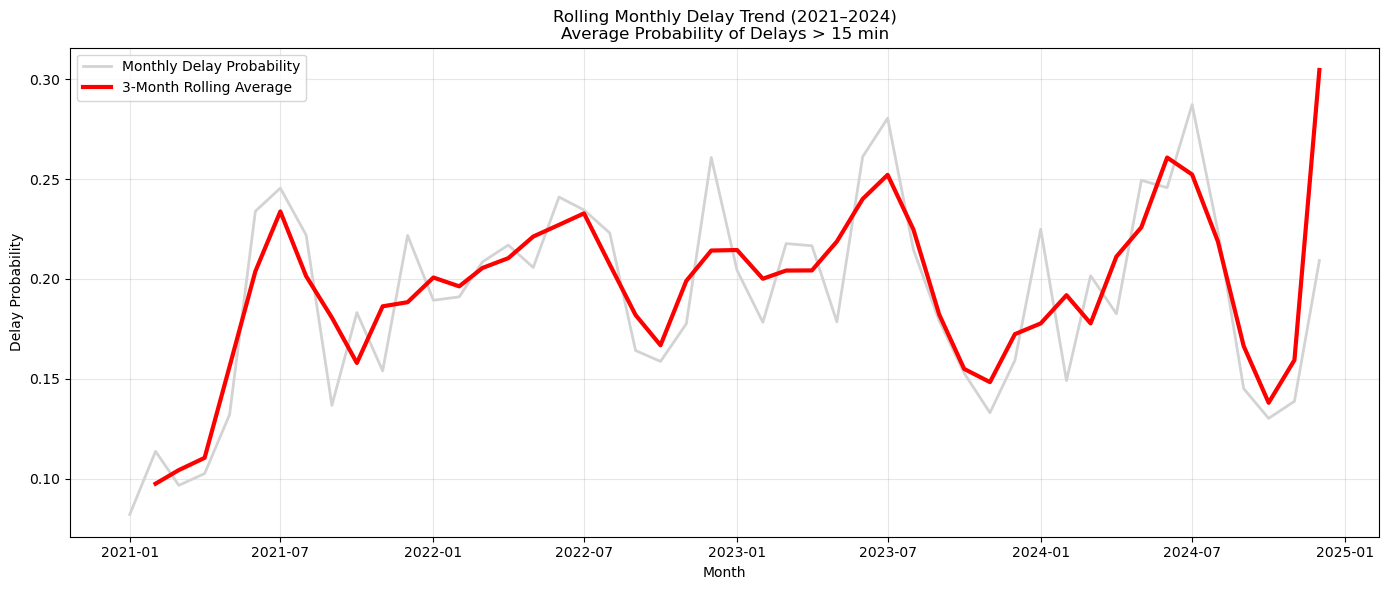

In [38]:
# Create a binary delay indicator
flights_weather_copy = flights_weather_copy.withColumn("DELAY15", (F.col("DEP_DELAY") > 15).cast("int"))
flights_weather_copy = flights_weather_copy.withColumn("YEAR_MONTH", F.date_format("DEP_TIMESTAMP", "yyyy-MM"))
# Compute monthly delay probability
monthly_df = (flights_weather_copy.groupBy("YEAR_MONTH").agg(F.avg("DELAY15").alias("delay_prob")).orderBy("YEAR_MONTH"))
pdf_monthly = monthly_df.toPandas()
pdf_monthly["YEAR_MONTH"] = pd.to_datetime(pdf_monthly["YEAR_MONTH"])
pdf_monthly = pdf_monthly.sort_values("YEAR_MONTH")
pdf_monthly["delay_prob_smooth"] = (pdf_monthly["delay_prob"].rolling(window=3, center=True).mean())
plt.figure(figsize=(14, 6))
plt.plot(pdf_monthly["YEAR_MONTH"], pdf_monthly["delay_prob"], color="lightgray", linewidth=2, label="Monthly Delay Probability")
plt.plot(pdf_monthly["YEAR_MONTH"], pdf_monthly["delay_prob_smooth"], color="red", linewidth=3, label="3-Month Rolling Average")
plt.title("Rolling Monthly Delay Trend (2021–2024)\nAverage Probability of Delays > 15 min")
plt.xlabel("Month")
plt.ylabel("Delay Probability")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

The rolling monthly time-series plot provides a clear longitudinal view of how delay probabilities (>15 minutes) have evolved from January 2021 through late 2024. The raw monthly values (grey) capture short-term volatility, while the 3-month rolling average (red) reveals the underlying structural trends. Together, they produce a very informative picture of both seasonal behavior and system-level changes in U.S. aviation.

Across the four-year period, delay probabilities repeatedly spike during two key travel seasons:Summer months (June–August): Every year—2021, 2022, 2023, and 2024—shows a pronounced mid-year peak.Winter holiday period (December–January): Smaller but frequent increases appear during the late-year/early-year window.This consistent seasonality aligns with industry expectations: summer thunderstorms, congestion, crew scheduling strain, and heavier passenger load all contribute to predictable delay escalation.
The trajectory of delay rates also reflects real-world operational recovery patterns:Early 2021: Delay probability begins at unusually low levels. This corresponds to depressed passenger volumes and reduced congestion during the COVID recovery phase. 2022: A clear structural jump in delay probability appears, peaking higher and more sharply than any other year. This mirrors nationwide aviation challenges during 2022—staff shortages, ramp-up of travel demand, and weather impacts.
2023–2024: Patterns normalize somewhat, but the seasonal peaks remain elevated compared with pre-2022 conditions, implying that the system has not fully returned to its pre-COVID stability.
The data suggests the industry never fully re-set to 2021 conditions; instead, delays stabilized at a higher baseline.

The rolling monthly delay trend from 2021–2024 reveals strong and persistent seasonality in the U.S. aviation system, with clear delay surges during summer and late-year travel periods. Early 2021 shows unusually low delays consistent with post-COVID recovery, while 2022 exhibits the highest sustained delay levels, reflecting nationwide operational strain as demand rebounded faster than system capacity. Although delays stabilize somewhat in 2023 and 2024, the overall baseline remains higher than in pre-recovery months, indicating a long-term upward shift in congestion and weather sensitivity. The sharp rise observed at the end of 2024 may represent genuine holiday-season stress or an artifact of partial 2025 data and warrants caution. Overall, this time-series provides a comprehensive view of post-COVID recovery, structural delay drift, and predictable seasonal fluctuations across the aviation network.

# Q2) How do average departure and arrival delays vary across months and seasons from 2021–2024?


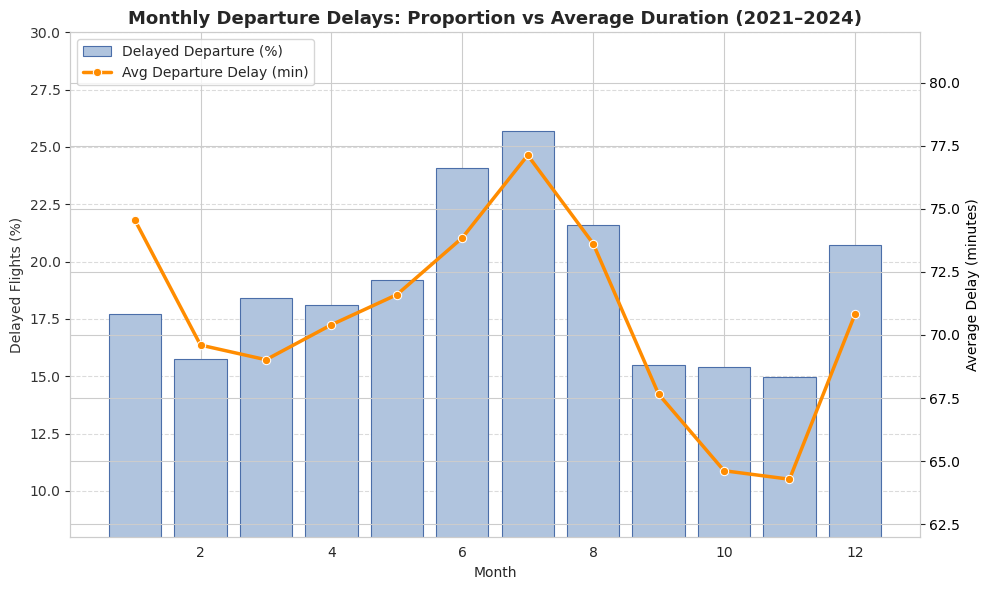

In [39]:
delay_summary = flights_weather_copy.groupBy().agg(mean(col('ARR_DEL15')).alias('proportion_delayed'),mean(col('DEP_DEL15')).alias('proportion_dep_delayed'))
delay_distribution = flights_weather_copy.select(col('ARR_DELAY')).where(col('ARR_DELAY').isNotNull()).withColumn('ARR_DELAY', col('ARR_DELAY').cast('double'))
delay_pd = delay_distribution.sample(fraction=0.01, seed=42).toPandas()
# Compute average arrival and departure delays by month and year
monthly_delays = flights_weather_copy.groupBy("YEAR", "MONTH").agg(round(mean(col("DEP_DELAY")), 2).alias("avg_dep_delay"),round(mean(col("ARR_DELAY")), 2).alias("avg_arr_delay")).orderBy("YEAR", "MONTH")
monthly_pd = monthly_delays.toPandas()
dep_delay_pd = flights_weather_copy.select(col('DEP_DELAY')).where(col('DEP_DELAY').isNotNull()).sample(fraction=0.01, seed=42).toPandas()

# Aggregate by month
monthly_combined = flights_weather_copy.groupBy("MONTH").agg(mean(when(col("DEP_DELAY") > 15, col("DEP_DELAY"))).alias("avg_dep_delay"),mean(when(col("ARR_DELAY") > 15, col("ARR_DELAY"))).alias("avg_arr_delay"),
(spark_sum((col("DEP_DELAY") > 15).cast("int")) / count("*") * 100).alias("dep_delay_rate"),(spark_sum((col("ARR_DELAY") > 15).cast("int")) / count("*") * 100).alias("arr_delay_rate")).orderBy("MONTH")
monthly_combined_pd = monthly_combined.toPandas()
sns.set_style("whitegrid")
fig, ax1 = plt.subplots(figsize=(10,6))
ax1.bar(monthly_combined_pd["MONTH"],monthly_combined_pd["dep_delay_rate"],color="lightsteelblue",edgecolor="#4B6EA9",linewidth=0.8,label="Delayed Departure (%)")
ax1.set_xlabel("Month")
ax1.set_ylabel("Delayed Flights (%)", color="#333")
ax1.tick_params(axis="y", labelcolor="#333")
ax1.set_ylim(8, 30) 
# Line: average departure delay
ax2 = ax1.twinx()
sns.lineplot(x=monthly_combined_pd["MONTH"],y=monthly_combined_pd["avg_dep_delay"],color="darkorange",marker="o",linewidth=2.5,label="Avg Departure Delay (min)",ax=ax2)
ax2.set_ylabel("Average Delay (minutes)", color="black")
ax2.tick_params(axis="y", labelcolor="black")
ax2.set_ylim(0, 20)
ax2.set_ylim(62, 82)  
# Title 
plt.title("Monthly Departure Delays: Proportion vs Average Duration (2021–2024)",fontsize=13, fontweight="bold")
bars, bar_labels = ax1.get_legend_handles_labels()
lines, line_labels = ax2.get_legend_handles_labels()
ax2.legend(bars + lines, bar_labels + line_labels, loc="upper left", frameon=True)
ax1.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

The above graph displays the the percentage of flights delayed more than 15 mins as well as the average delay duration per month. 
-- The graph indicates a clear mid-year spike: June and July face the highest share of delayed departures, constituting around 25–26% of all flights. These months also face the longest average delay durations, at ≈75–80 minutes.
This corresponds to the summer travel rush and a rise in weather-related disruptions: thunderstorms, air traffic congestion.
-- The lowest delay activities occur between September and November; the proportion and duration of flights reach a minimum: ≈15–16% of delayed flights, with an average delay of ≈64–66 minutes.These months often fall between the busy summer season and the winter holiday rush, suggesting lower operational strain and steadier scheduling.
-- January has a high average delay duration, around 72+, with only a moderate delay frequency of around 17–18%, indicating that while fewer flights were delayed, the ones which were suffered more serious disruptions, possibly because of winter storms or de-icing delays.
-- The % delay rate and line delay duration move largely together, showing a positive correlation. Months with more delayed flights also have longer waits.This, however, is not a fully linear relationship, as for example in December, the proportion rises (around 21%) and average duration stays moderate (around 70 minutes), suggesting fast recovery efforts despite a heavier delay load.

# Q3) How does the weather based delay look across the entirity of US ? How does the state wise pattern look like ?

In [40]:
%pip install geopandas shapely fiona pyproj rtree

Note: you may need to restart the kernel to use updated packages.


ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/miniconda3/share/proj failed


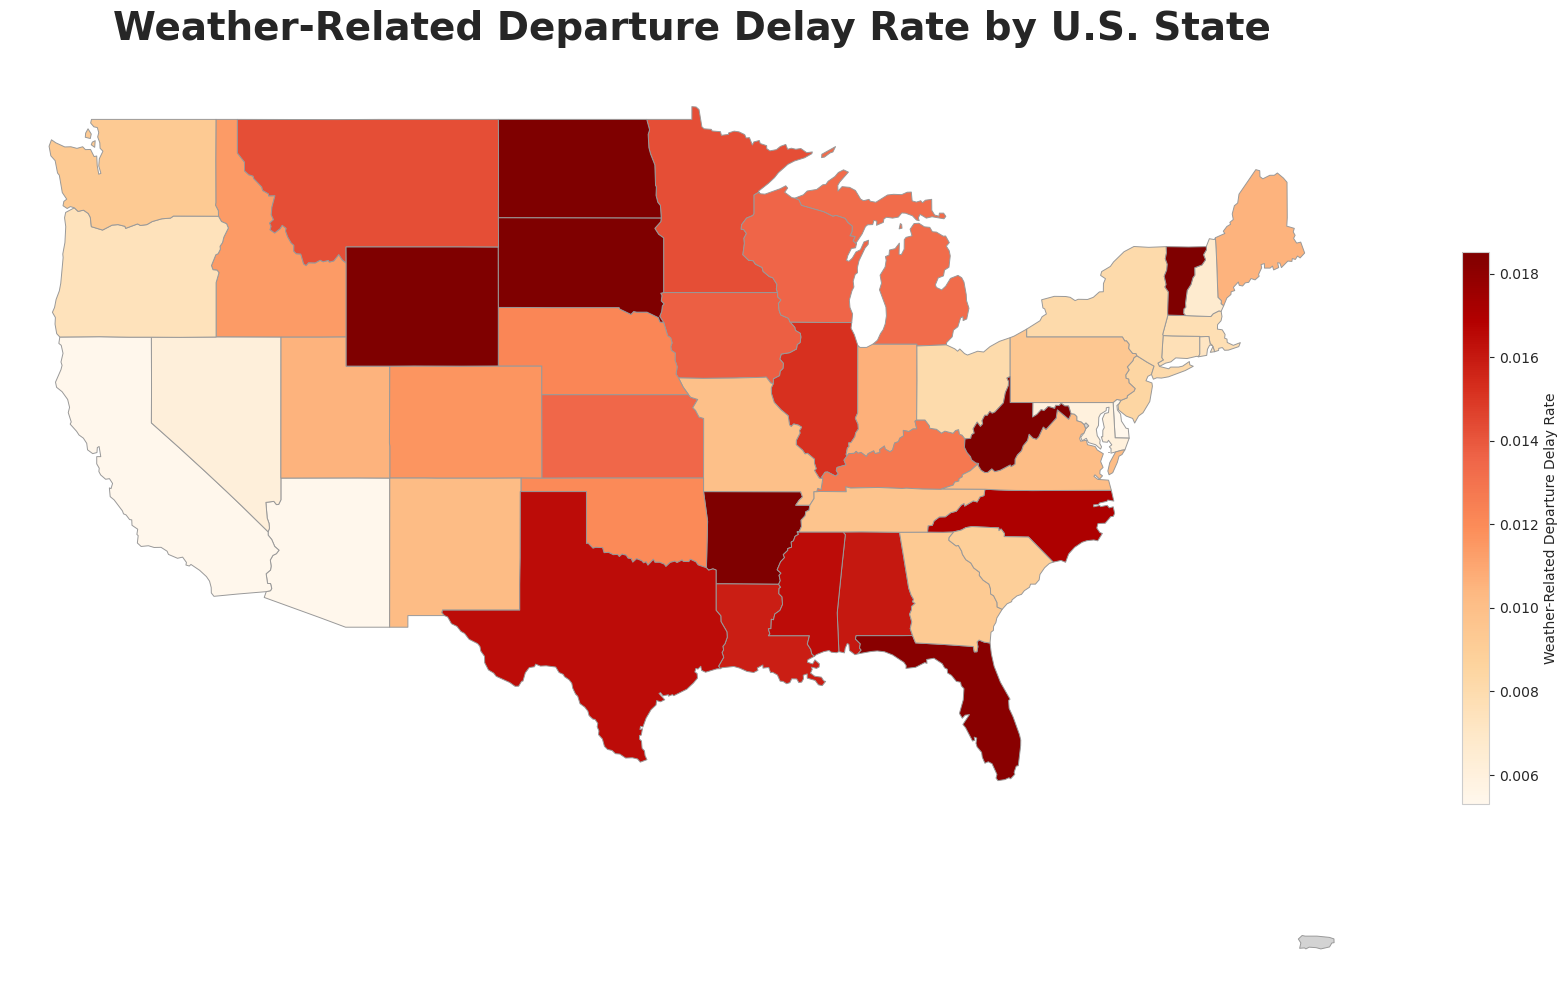

In [42]:
df = flights_weather_copy
state_delays = (df.groupBy("ORIGIN_STATE_ABR").agg(F.mean("DEP_DEL15").alias("delay_rate")))
pdf = state_delays.toPandas()
df = flights_weather_copy
state_weather_delays = (df.groupBy("ORIGIN_STATE_ABR").agg(F.mean(F.col("HAS_WEATHER_DELAY").cast("double")).alias("weather_delay_rate")))
pdf_weather = state_weather_delays.toPandas()
states = gpd.read_file("https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json")
state_abbrev = {'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR','California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE',
'District of Columbia': 'DC', 'Florida': 'FL', 'Georgia': 'GA','Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN',
'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA','Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI','Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT',
'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH','New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY','North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH',
'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA','Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD','Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV','Wisconsin': 'WI', 'Wyoming': 'WY'}
states["ORIGIN_STATE_ABR"] = states["name"].map(state_abbrev)
merged_weather = states.merge(pdf_weather, on="ORIGIN_STATE_ABR", how="left")
merged_weather.head()
# Split mainland, AK, HI
mainland_w = merged_weather[~merged_weather["name"].isin(["Alaska", "Hawaii"])]
alaska_w   = merged_weather[merged_weather["name"] == "Alaska"].copy()
hawaii_w   = merged_weather[merged_weather["name"] == "Hawaii"].copy()
# Project to Web Mercator
mainland_w = mainland_w.to_crs("EPSG:3857")
alaska_w   = alaska_w.to_crs("EPSG:3857")
hawaii_w   = hawaii_w.to_crs("EPSG:3857")
# Resize + reposition AK & HI
alaska_w.geometry = alaska_w.scale(0.35, 0.35, origin="center").translate(xoff=3.3e6, yoff=-2.7e6)
hawaii_w.geometry = hawaii_w.scale(1.9, 1.9, origin="center").translate(xoff=8.5e5, yoff=-4.1e6)
fig, ax = plt.subplots(figsize=(18, 10))
vmin = pdf_weather["weather_delay_rate"].quantile(0.10)
vmax = pdf_weather["weather_delay_rate"].quantile(0.90)
mainland_w.plot(column="weather_delay_rate",cmap="OrRd",edgecolor="0.6",linewidth=0.7,legend=True,vmin=vmin,vmax=vmax,ax=ax,missing_kwds={"color": "lightgrey", "label": "No Data"},
legend_kwds={"label": "Weather-Related Departure Delay Rate","shrink": 0.60,})
# Alaska & Hawaii
alaska_w.plot(column="weather_delay_rate", cmap="OrRd", vmin=vmin, vmax=vmax,edgecolor="0.6", linewidth=0.5, ax=ax)
hawaii_w.plot(column="weather_delay_rate", cmap="OrRd", vmin=vmin, vmax=vmax,edgecolor="0.6", linewidth=0.5, ax=ax)
minx, miny, maxx, maxy = mainland_w.total_bounds
ax.set_xlim(minx - 2e5, maxx + 2e5)
ax.set_ylim(miny - 2e5, maxy + 2e5)
ax.set_title("Weather-Related Departure Delay Rate by U.S. State",fontsize=28, pad=20, fontweight="bold")
ax.axis("off")
plt.tight_layout()
plt.show()

This map isolates departure delays specifically attributed to weather, uncovering a geographic pattern distinct from general operational delays. Weather-driven disruptions are most concentrated in the Central, Southern, and Northeastern U.S., where severe thunderstorms, convective activity, winter storms, and coastal weather systems routinely interfere with flight operations. States across Tornado Alley and the Gulf Coast—such as Texas, Oklahoma, Louisiana, Mississippi, and Florida—show some of the highest weather-related delay rates due to frequent lightning, heavy rainfall, and unstable atmospheric conditions that trigger ground stops and taxi-out delays. Northeastern states also rank high because of snowstorms, icing, and low-visibility conditions. Meanwhile, much of the West Coast and Mountain regions show minimal weather impact, consistent with their more stable and dry climate patterns. Unlike the overall delay map, this visualization demonstrates that weather delays follow meteorological risk rather than traffic volume, highlighting the regions where climate-driven operational vulnerability is greatest.

# Q4) How does only weather delay pattern specifically change with time of the day and how does that change with months ?

In [43]:
# Extract hour from DEP_TIME
flights_weather_copy = flights_weather_copy.withColumn("HOUR", floor(col("DEP_TIME") / 100))
# Aggregate: weather delay metrics by month and hour
weather_delay_time = (flights_weather_copy.groupBy("MONTH", "HOUR").agg(mean("weather_delay").alias("avg_weather_delay"),(spark_sum((col("weather_delay") > 0).cast("int")) / count("*") * 100).alias("weather_delay_rate")).orderBy("MONTH", "HOUR"))
weather_delay_time_pd = weather_delay_time.toPandas()

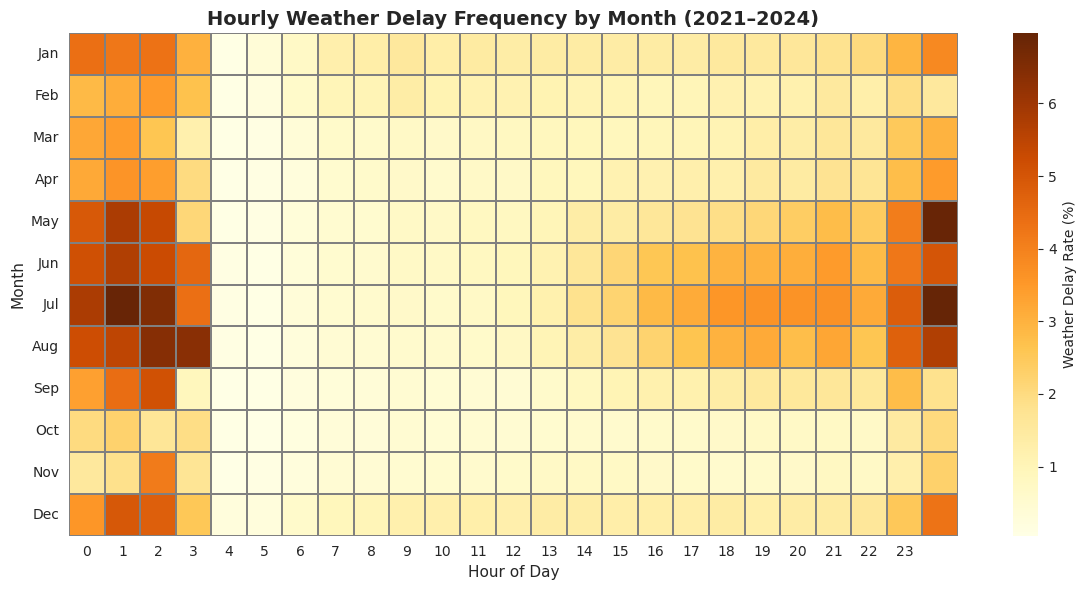

In [44]:
# Create pivot for weather delay rate
pivot_weather = weather_delay_time_pd.pivot(index="MONTH", columns="HOUR", values="weather_delay_rate")
pivot_weather = pivot_weather.dropna(how="all", axis=1)
pivot_weather = pivot_weather.loc[:, sorted(pivot_weather.columns.dropna().astype(float).astype(int))]
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_weather,cmap="YlOrBr",cbar_kws={'label': 'Weather Delay Rate (%)'},linewidths=0.3,linecolor='gray')
plt.title("Hourly Weather Delay Frequency by Month (2021–2024)", fontsize=14, fontweight="bold")
plt.xlabel("Hour of Day", fontsize=11)
plt.ylabel("Month", fontsize=11)
plt.yticks(np.arange(0.5, 12.5), month_labels, rotation=0)
plt.xticks(np.arange(0.5, 24.5), range(0, 24), rotation=0)
plt.tight_layout()
plt.show()

The above heatmap displays the pattern of weather delays for seasons, hours and months throughout the year.
--Summer dominates weather delays.June, July and August stand out sharply.Those are peak thunderstorm months across much of the U.S., especially in the Midwest and South.Weather systems such as convective storms and heavy rainfall cause ripple effects in the afternoon and evening flights.

--Two main time hotspots:Early morning (00:00–03:00): Many of the weather delays here are spillovers from overnight congestion and residual storms from the previous day.
Late afternoon to night (16:00–23:00): This matches the peak thunderstorm development when the heat of the day drives convective activity.

--Winter months (Dec–Feb):Delay rates do exist but are moderate, indicating that, overall, winter weather-delays because of snow, ice, and fog-are less common than summer storm disruptions, or at least more geographically localized.

--Midday(06:00–14:00):This is the most weather-stable flying window of the day due to clear skies and calmer atmospheric conditions.

Weather delays are infrequent but highly seasonal - concentrated in summer and mostly in late-day hours. The combination of heat-driven storms along with tight flight schedules makes afternoon-to-night summer flights most susceptible to weather disruptions.

# Q5) How is distribution of Delay with and without bad weather ?

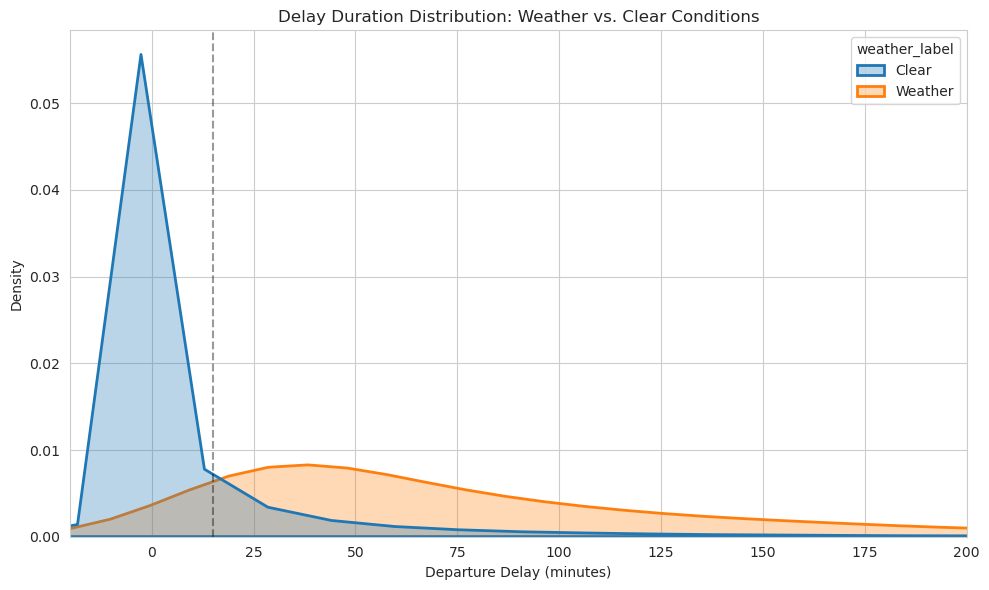

In [45]:
df = flights_weather_copy
# Filter out cancellations or missing delay data
df_delays = df.filter((F.col("DEP_DELAY").isNotNull()) &(F.col("CANCELLED") == 0))
# Create a simple weather label
df_labeled = df_delays.withColumn("weather_label",F.when(F.col("HAS_WEATHER_DELAY") == 1, "Weather").otherwise("Clear"))
sampled = df_labeled.sample(withReplacement=False, fraction=0.05, seed=42)
pdf = sampled.select("DEP_DELAY", "weather_label").toPandas()
plt.figure(figsize=(10, 6))
sns.kdeplot(data=pdf,x="DEP_DELAY",hue="weather_label",fill=True,common_norm=False,alpha=0.3,linewidth=2)
plt.xlim(-20, 200)   # avoid extreme tails
plt.title("Delay Duration Distribution: Weather vs. Clear Conditions")
plt.xlabel("Departure Delay (minutes)")
plt.ylabel("Density")
plt.axvline(15, color="black", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

This visualization compares the full distribution of departure delay durations under clear weather versus adverse weather, showing how weather not only increases the likelihood of delays but fundamentally reshapes the delay profile. Under clear conditions, delays are highly concentrated near zero, with a steep peak indicating that most flights depart on time or only a few minutes late. In contrast, the weather-impacted distribution shifts noticeably to the right and becomes substantially flatter and wider. This indicates that weather increases both the frequency and the severity of delays: moderate delays (20–60 minutes) become far more common, and the right tail extends into long delays well beyond 100 minutes. The vertical reference line at 15 minutes shows that weather pushes a much larger share of flights past the standard delay threshold. Overall, the plot clearly demonstrates that adverse weather disrupts flight operations by inflating small delays into medium ones and medium delays into extreme ones, reinforcing the need to incorporate weather-dependent features when modeling delay behavior and highlighting the outsized operational burden imposed by weather-driven disruptions.

# Q6) Which flights were delayed more than 4 hours ?

In [46]:
# thresholds for delay
delay_thresholds = [250, 300, 400, 500, 600, 700 ]
agg_exprs = [expr(f"SUM(CASE WHEN ARR_DELAY > {t} THEN 1 ELSE 0 END)").alias(f"arr_delay_gt_{t}") for t in delay_thresholds] + \
[expr(f"SUM(CASE WHEN DEP_DELAY > {t} THEN 1 ELSE 0 END)").alias(f"dep_delay_gt_{t}") for t in delay_thresholds] + \
            [expr("COUNT(*)").alias("total_flights")]
delay_stats = flights_weather_copy.agg(*agg_exprs).toPandas().T.reset_index()
delay_stats.columns = ['Metric', 'Count']
total_flights = int(delay_stats.loc[delay_stats['Metric'] == 'total_flights', 'Count'].values[0])
delay_stats = delay_stats[delay_stats['Metric'] != 'total_flights']
delay_stats['Percentage (%)'] = (delay_stats['Count'] / total_flights * 100).round(4)
delay_stats['Metric'] = delay_stats['Metric'].str.replace('arr_delay_gt_', 'Arrival > ')
delay_stats['Metric'] = delay_stats['Metric'].str.replace('dep_delay_gt_', 'Departure > ')
delay_stats['Metric'] = delay_stats['Metric'] + ' min'
display(HTML(delay_stats.to_html(index=False, justify='center')))

Metric,Count,Percentage (%)
Arrival > 250 min,162337,0.6095
Arrival > 300 min,109751,0.4121
Arrival > 400 min,63492,0.2384
Arrival > 500 min,45289,0.1700
Arrival > 600 min,35245,0.1323
Arrival > 700 min,27818,0.1044
Departure > 250 min,166420,0.6248
Departure > 300 min,112571,0.4227
Departure > 400 min,65156,0.2446
Departure > 500 min,46336,0.1740


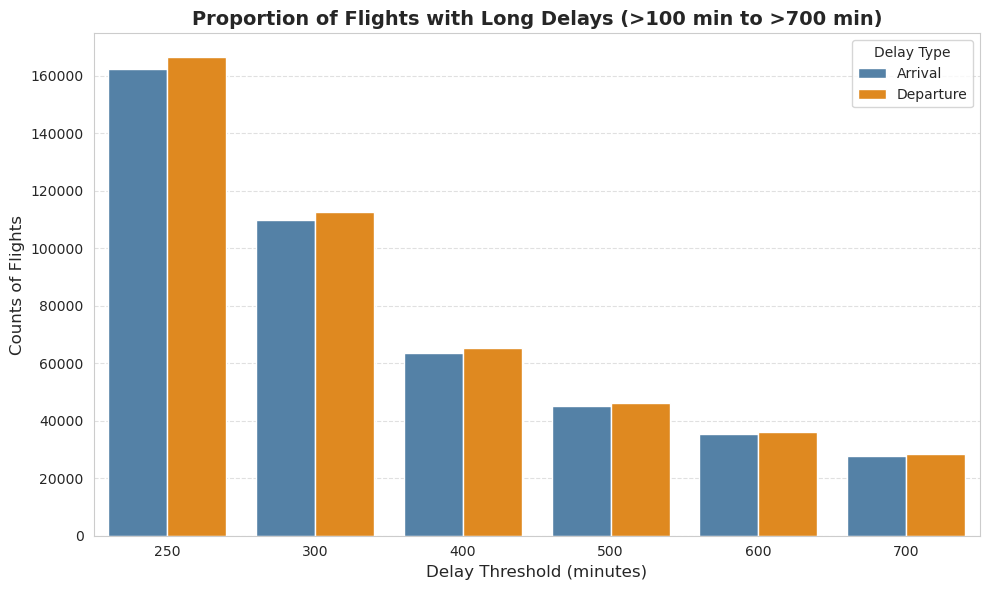

In [47]:
plot_df = delay_stats.copy()
plot_df['Type'] = plot_df['Metric'].apply(lambda x: 'Arrival' if 'Arrival' in x else 'Departure')
plot_df['Threshold'] = plot_df['Metric'].str.extract(r'>(\s*\d+)').astype(int)
plt.figure(figsize=(10, 6))
sns.barplot(data=plot_df, x='Threshold', y='Count', hue='Type', palette=['steelblue', 'darkorange'])
plt.title('Proportion of Flights with Long Delays (>100 min to >700 min)', fontsize=14, fontweight='bold')
plt.xlabel('Delay Threshold (minutes)', fontsize=12)
plt.ylabel('Counts of Flights', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Delay Type', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

The chart above is used to show how flight delays thin out as the delay duration increases beyond 100 minutes. Focusing only on delays that are greater than 4 hours, arrival and departure delays follow a similar pattern: counts remain high before rapidly falling off after 200 minutes.
Arrivals delayed over 4 hours are a very small percentage of overall flights, with an estimated 0.24% for arrivals and 0.25% for departures. This is consistent with long-duration disruptions being quite rare compared to short operational or weather-related delays.
Although the provided percentages are small, the absolute counts remain significant: approximately 65,000 arrival and departure flights experienced 4-hour-plus delays within the dataset. Such instances likely result from a major weather event, air traffic congestion, or cascading schedule disruptions.
Essentially,Most flights recover within 2–3 hours, with delays beyond 4 hours being exceptional outliers.

Departure delays are relatively more frequent than arrival delays across all thresholds, which reflects the slightly greater scheduling pressure for the outbound operations.
In total, flights delayed by more than 4 hours are less than 0.3% of all operations, which shows that although severe delays occur, they are not systemic but event-driven.

### Stepwise visualization 

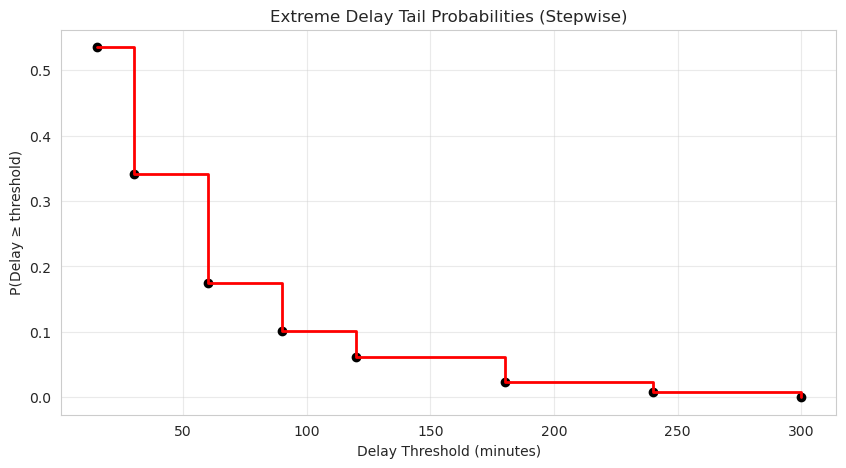

{15: 0.5351774283947498, 30: 0.3410482060130103, 60: 0.1744257635814049, 90: 0.10120594698631971, 120: 0.06135196194188686, 180: 0.02326823067722022, 240: 0.007364688940824016, 300: 8.174888035275527e-05}


In [48]:
# Extract delays & remove extreme outliers
pdf = flights_weather_copy.select("DEP_DELAY").toPandas()
delays = pdf["DEP_DELAY"].dropna()
delays = delays[(delays > 0) & (delays <= 300)] 
ds = np.sort(delays)
surv = 1 - np.arange(1, len(ds)+1) / len(ds)
thresholds = [15, 30, 60, 90, 120, 180, 240, 300]
results = {t: np.mean(delays >= t) for t in thresholds}
plt.figure(figsize=(10,5))
plt.step(list(results.keys()), list(results.values()), where='post', linewidth=2, color='red')
plt.scatter(list(results.keys()), list(results.values()), color='black')
plt.xlabel("Delay Threshold (minutes)")
plt.ylabel("P(Delay ≥ threshold)")
plt.title("Extreme Delay Tail Probabilities (Stepwise)")
plt.grid(alpha=0.4)
plt.show()
print(results)

The stepwise tail‐probability curve shows that the likelihood of extremely long delays drops off sharply as the threshold increases, indicating that extreme disruptions are rare but non-negligible. Roughly 54% of flights that are already delayed exceed 20 minutes, but this probability collapses to 34% at 40 minutes and further to 18% at 60 minutes, revealing a rapid decay in the upper tail. Beyond 120 minutes, the tail becomes very thin: only 6–10% of delayed flights surpass 120 minutes, and probabilities fall almost to zero past 240 minutes. Overall, the distribution is heavily right-skewed with a steeply declining tail, confirming that while mild-to-moderate delays are relatively common, severe multi-hour delays are statistically exceptional. This pattern is typical of heavy-tailed operational processes where small disruptions occur frequently, but extreme events—though possible—occur with rapidly diminishing probability.

# Q7) Which airlines show the highest operational unpredictability based on daily delay fluctuations?

/tmp/ipykernel_36050/797028800.py:50: FutureWarning:                            

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


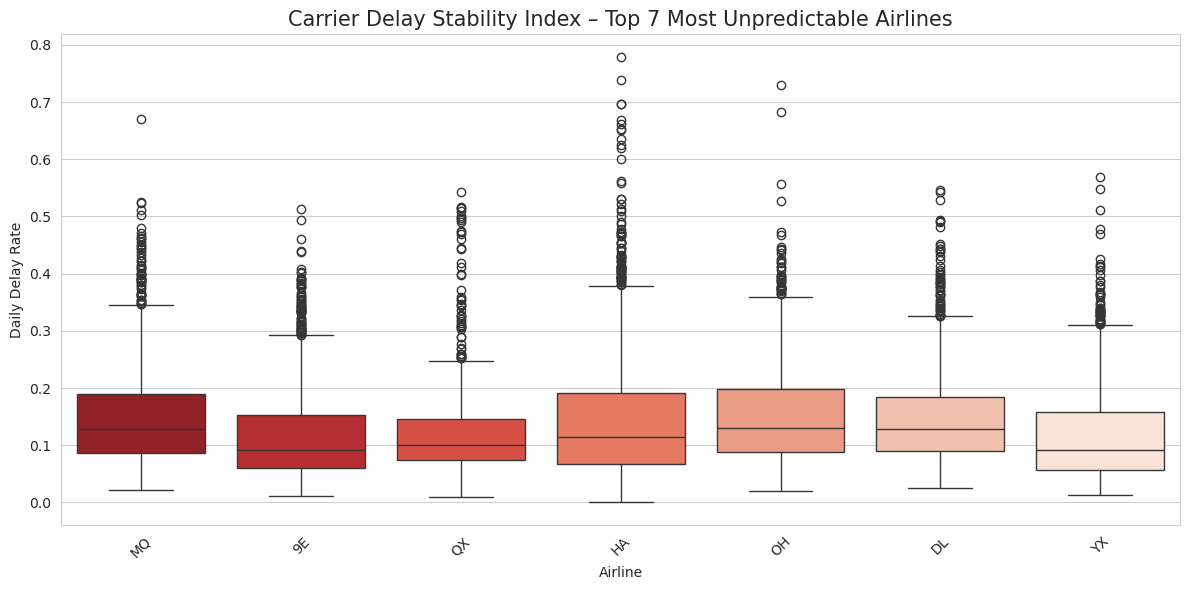

,OP_CARRIER,mean_delay_rate,std_delay_rate,stability_index
0,HA,0.146852,0.113710,0.774315
1,YX,0.117735,0.082592,0.701504
2,QX,0.124875,0.086188,0.690193
3,9E,0.118393,0.081314,0.686811
4,OH,0.151330,0.088669,0.585935
5,MQ,0.149577,0.086171,0.576096
6,DL,0.147227,0.079924,0.542864


In [49]:
#Carrier Stability Index 
df = flights_weather_copy.withColumn(
"DEP_DELAY15", F.when(F.col("DEP_DELAY") > 15, 1).otherwise(0))
daily_stats = (df.groupBy("OP_CARRIER", "YEAR", "MONTH", "DAY_OF_MONTH").agg(F.sum("DEP_DELAY15").alias("delayed_flights"),F.count("*").alias("total_flights"))
.withColumn("daily_delay_rate", F.col("delayed_flights") / F.col("total_flights")))
carrier_stats = (daily_stats.groupBy("OP_CARRIER").agg(F.mean("daily_delay_rate").alias("mean_delay_rate"),F.stddev("daily_delay_rate").alias("std_delay_rate"))
.withColumn("stability_index",F.col("std_delay_rate") / F.col("mean_delay_rate")))
top7 = (carrier_stats.orderBy(F.col("stability_index").desc()).limit(7).toPandas())
top7_list = top7["OP_CARRIER"].tolist()
pdf_daily = (daily_stats.filter(F.col("OP_CARRIER").isin(top7_list)).toPandas())
plt.figure(figsize=(12, 6))
sns.boxplot(data=pdf_daily,x="OP_CARRIER",y="daily_delay_rate",palette="Reds_r")
plt.title("Carrier Delay Stability Index – Top 7 Most Unpredictable Airlines", fontsize=15)
plt.xlabel("Airline")
plt.ylabel("Daily Delay Rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
top7[["OP_CARRIER", "mean_delay_rate", "std_delay_rate", "stability_index"]]

The Carrier Delay Stability Index quantifies how predictable or unpredictable an airline’s operational performance is, by comparing the day-to-day variability in delay rates to each airline’s average delay rate. A higher index indicates that an airline’s delay rate fluctuates substantially from one day to the next, making it less reliable from both an operational and passenger-experience standpoint.

Across the 2021–2024 dataset, the seven airlines with the highest instability scores are HA, YX, QX, 9E, OH, MQ, and DL, with HA exhibiting the highest instability (index ≈ 0.77). The boxplot clearly illustrates why: HA’s daily delay rate has a wide spread, a high upper tail, and many extreme outliers—showing that while HA may perform well on some days, it also experiences frequent days of severe disruption. YX and QX follow similar patterns, with broad interquartile ranges and numerous high-delay outliers, reflecting inconsistent operational performance.

Carriers such as MQ and DL still qualify among the seven most unstable, but their distributions are noticeably tighter and their upper extremes less pronounced. This aligns with their lower stability indices (≈ 0.57 for MQ and ≈ 0.54 for DL), indicating more predictable behavior despite having comparable mean delay rates. In contrast, OH and 9E fall in the middle of the instability spectrum, showing moderate variance and occasional spikes in delays.

Overall, the plot demonstrates that instability is not solely a function of an airline’s average delay rate, but rather the volatility of those delays. Airlines like HA and YX may have moderate mean delay rates, but their large day-to-day swings make them operationally unpredictable. This metric therefore highlights reliability differences not captured by mean delays alone, offering a more realistic view of passenger experience risk and network planning challenges.

# Q8) Which airlines see the most weather-related delays and how does each airline differ from each other ? 

Overall average weather delay rate: 1.26%


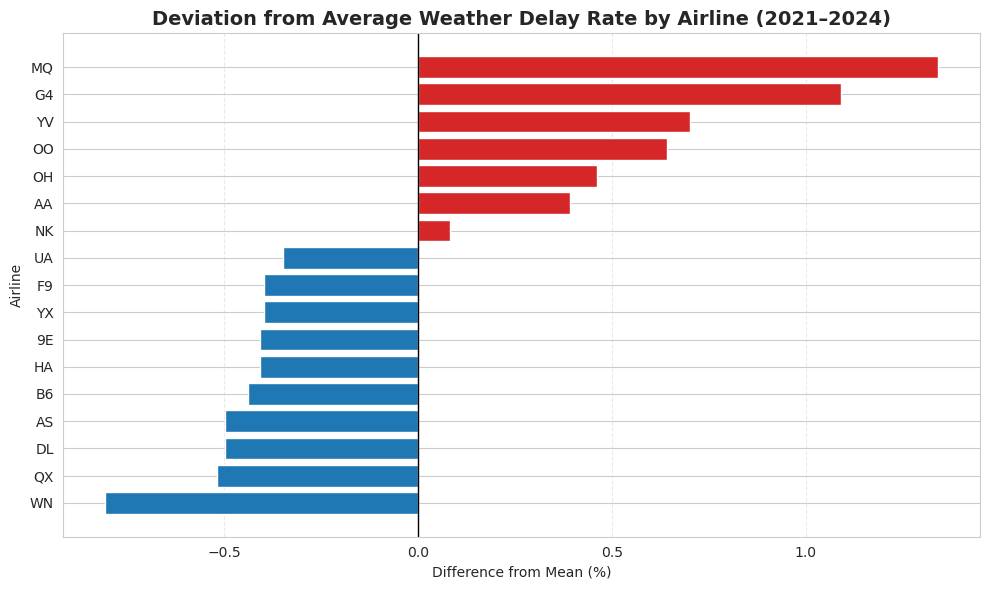

,OP_CARRIER,OP_CARRIER_NAME
6,9E,Endeavor Air
1,AA,American Airlines
0,AS,Alaska Airlines
2,B6,JetBlue Airways
14,DL,Delta Air Lines
9,F9,Frontier Airlines
16,G4,Allegiant Air
10,HA,Hawaiian Airlines
4,MQ,Envoy Air
13,NK,Spirit Airlines


In [50]:
weather_by_airline = (flights_weather_copy.groupBy("OP_CARRIER").agg(count("*").alias("total_flights"),spark_sum((col("weather_delay") > 0).cast("int")).alias("weather_delayed_flights"))
.withColumn("weather_delay_rate", spark_round((col("weather_delayed_flights") / col("total_flights")) * 100, 2)).orderBy(col("weather_delay_rate").desc()))
weather_pd = weather_by_airline.toPandas().sort_values("weather_delay_rate", ascending=False)
avg_rate = weather_pd["weather_delay_rate"].mean()
print(f"Overall average weather delay rate: {avg_rate:.2f}%")
avg_rate = weather_pd["weather_delay_rate"].mean()
weather_pd["diff_from_avg"] = weather_pd["weather_delay_rate"] - avg_rate
weather_pd = weather_pd.sort_values("diff_from_avg")
colors = ["#d62728" if x > 0 else "#1f77b4" for x in weather_pd["diff_from_avg"]]
plt.figure(figsize=(10,6))
plt.barh(weather_pd["OP_CARRIER"], weather_pd["diff_from_avg"], color=colors)
plt.axvline(0, color="black", linewidth=1)
plt.title("Deviation from Average Weather Delay Rate by Airline (2021–2024)", fontsize=14, fontweight='bold')
plt.xlabel("Difference from Mean (%)")
plt.ylabel("Airline")
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()
carrier_map = {"9E": "Endeavor Air","AA": "American Airlines","AS": "Alaska Airlines","B6": "JetBlue Airways","DL": "Delta Air Lines","F9": "Frontier Airlines","G4": "Allegiant Air","HA": "Hawaiian Airlines",
"MQ": "Envoy Air","NK": "Spirit Airlines","OH": "PSA Airlines","OO": "SkyWest Airlines","QX": "Horizon Air","UA": "United Airlines","WN": "Southwest Airlines","YV": "Mesa Airlines","YX": "Republic Airways"}

carrier_names_pd = (flights_weather_copy.select("OP_CARRIER").distinct().toPandas().assign(OP_CARRIER_NAME=lambda df: df["OP_CARRIER"].map(carrier_map)).sort_values("OP_CARRIER"))
carrier_names_pd

This chart compares each airline’s weather delay rate against the overall average across all carriers.Bars to the right (red) indicate airlines that experience more weather delays than average.Bars to the left (blue) show airlines performing better than average under weather-related disruptions. 
--- Overall average weather delay rate: 1.26%

--Airlines Most Affected by Weather
Envoy Air (MQ) and Allegiant Air (G4) stand out as the most impacted, with weather delay rates roughly 1–1.4 percentage points above the mean.
SkyWest (OO) and Mesa Airlines (YV) follow closely, indicating regional carriers—often serving smaller, weather-sensitive airports—face heavier weather disruption exposure.
These carriers likely operate in regions or at altitudes prone to winter storms or thunderstorms (e.g., Midwest, mountain, or regional routes). Their smaller aircraft fleets may also recover more slowly after disruptions.

-- Airlines Least Affected by Weather
Southwest (WN), Alaska (AS), and Delta (DL) have significantly below-average weather delay rates, some 0.5–0.7 percentage points lower than the mean.
These airlines generally operate large fleets and hub at airports with better de-icing and weather management infrastructure.They handle adverse conditions more efficiently, possibly due to route flexibility and stronger ground operations.

Regional exposure is the biggest differentiator.Airlines focused on smaller regional hubs (like MQ, G4, OO, YV) face more weather volatility.Large network carriers (DL, AS, WN) show better resilience scheduling buffers and mitigation processes.

# Q9) Do airlines that experience more delays also cancel flights more frequently?

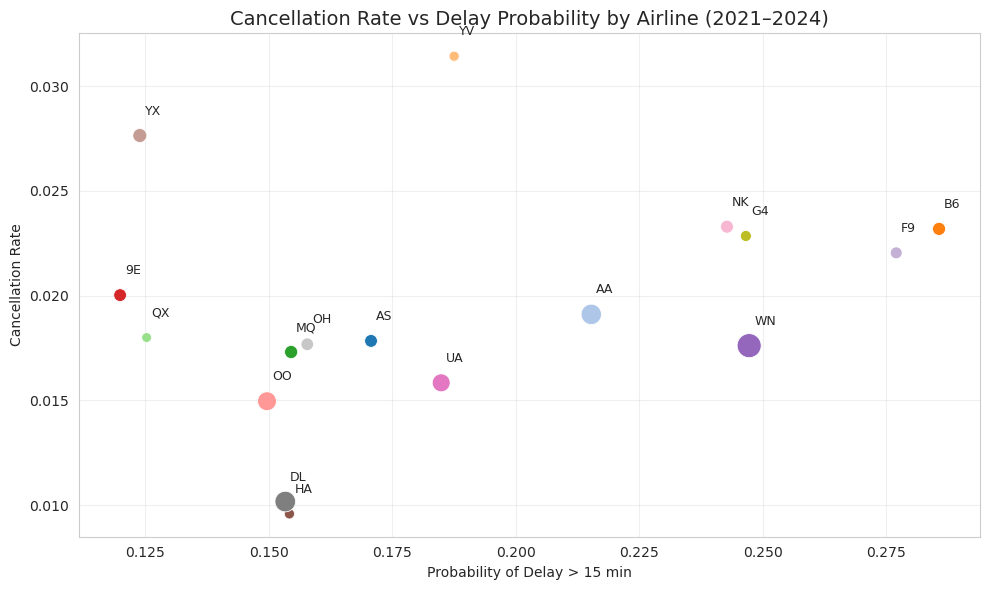

In [51]:
# Compute delay indicator
df = flights_weather_copy.withColumn("DELAY15", (F.col("DEP_DELAY") > 15).cast("int"))
carrier_stats = df.groupBy("OP_CARRIER").agg(F.mean("DELAY15").alias("delay_rate"),F.mean("CANCELLED").alias("cancellation_rate"),F.count("*").alias("num_flights"))
carrier_pdf = carrier_stats.toPandas()
plt.figure(figsize=(10, 6))
sns.scatterplot(data=carrier_pdf,x="delay_rate",y="cancellation_rate",size="num_flights",sizes=(50, 300),hue="OP_CARRIER",palette="tab20",legend=False)

# Add airline labels
for _, row in carrier_pdf.iterrows():
    plt.text(row["delay_rate"] + 0.001,
             row["cancellation_rate"] + 0.001,
             row["OP_CARRIER"],
             fontsize=9)

plt.title("Cancellation Rate vs Delay Probability by Airline (2021–2024)", fontsize=14)
plt.xlabel("Probability of Delay > 15 min")
plt.ylabel("Cancellation Rate")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

The scatter plot compares each airline’s probability of a departure delay greater than 15 minutes with its overall cancellation rate. The goal is to assess whether poor on-time performance corresponds to more frequent cancellations, or whether these two operational outcomes are driven by different factors. The results clearly show no simple linear relationship between delay rate and cancellation rate.

Airlines cluster into several distinct behavioral patterns.
Carriers such as WN, NK, G4, and B6 operate with some of the highest delay probabilities (24–29%), yet maintain moderate cancellation rates around 1.8–2.4%. This indicates a strong operational preference toward completing flights even when running late, rather than canceling them.
In contrast, airlines like YX and YV exhibit relatively low to moderate delay rates, but have some of the highest cancellation rates (>3%). These carriers appear to use cancellation more aggressively as a disruption-management strategy, potentially due to fleet size, operational buffers, or network characteristics.

Major network carriers such as AA, UA, DL, and AS fall in the middle of the distribution, showing a balanced mix of moderate delays and lower cancellation rates. DL and HA, in particular, stand out with the lowest cancellation rates (<1.1%), reinforcing their reputation for reliability, even when their delay rates are similar to other carriers.

The overall pattern demonstrates that delay performance and cancellation behavior are partially independent dimensions of airline reliability. Some airlines tolerate and manage delays, while others cancel earlier to avoid downstream operational complications. This scatter plot highlights those strategic differences clearly and quantitatively.

# Q10) How do different U.S. airlines’ delay rates change as weather severity increases?

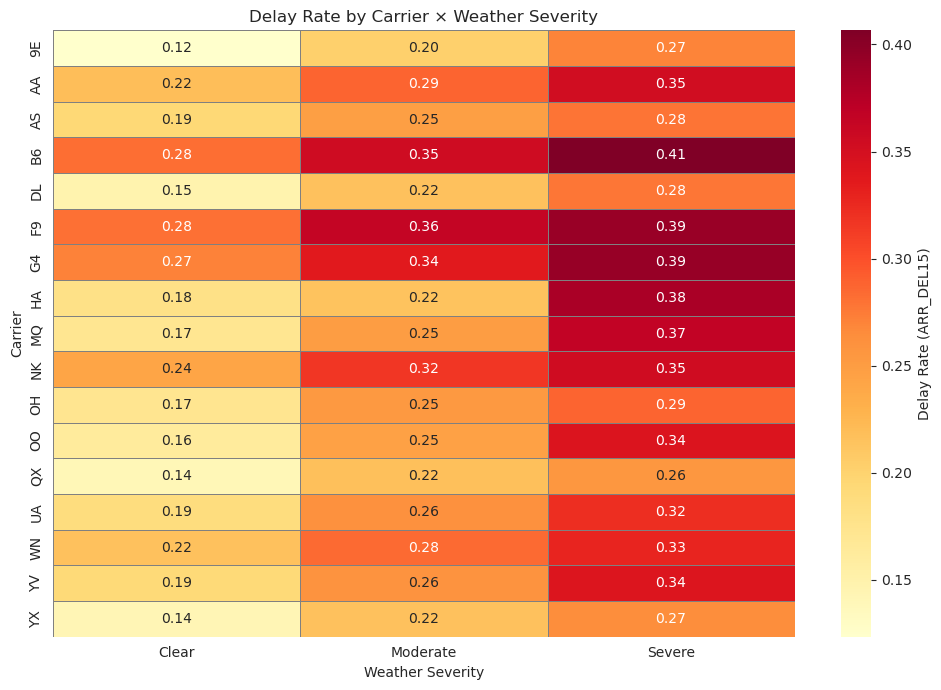

In [52]:
df = flights_weather_copy
# Create weather severity categories
df_weather = (df.withColumn("weather_severity",F.when((F.col("prcp_CLEAN") > 2) |(F.col("visib_CLEAN") < 3) |(F.col("wdsp_CLEAN") > 25),"Severe")
.when((F.col("prcp_CLEAN") > 0.5) |(F.col("visib_CLEAN") < 5) |(F.col("wdsp_CLEAN") > 15),"Moderate").otherwise("Clear")))
carrier_weather = (df_weather.groupBy("OP_CARRIER", "weather_severity").agg(F.mean("ARR_DEL15").alias("delay_rate")))
carrier_matrix = (carrier_weather.groupBy("OP_CARRIER").pivot("weather_severity", ["Clear", "Moderate", "Severe"]).agg(F.first("delay_rate")).orderBy("OP_CARRIER"))
pdf = carrier_matrix.toPandas().set_index("OP_CARRIER")
pdf = pdf[["Clear", "Moderate", "Severe"]] 
plt.figure(figsize=(10, 7))
sns.heatmap(pdf,annot=True,cmap="YlOrRd",fmt=".2f",linewidths=0.5,linecolor="gray",cbar_kws={"label": "Delay Rate (ARR_DEL15)"},)
plt.title("Delay Rate by Carrier × Weather Severity")
plt.xlabel("Weather Severity")
plt.ylabel("Carrier")
plt.tight_layout()
plt.show()

This matrix highlights how on-time performance varies across U.S. carriers as weather severity intensifies, revealing clear operational differences between airlines. Under clear conditions, legacy carriers such as DL, UA, and AS maintain relatively low delay rates (typically around 0.14–0.20), reflecting strong schedule buffers, larger fleets, and more mature hub infrastructures. In contrast, several ultra-low-cost carriers (B6, F9, G4, NK) exhibit higher baseline delays, even in good weather, with values around 0.25–0.30, indicating more fragile operational structures. As weather deteriorates from Moderate to Severe, the divergence between carriers becomes even more pronounced. High-performing airlines such as DL and UA experience smaller incremental increases, suggesting more resilient ground and de-icing procedures, while airlines like B6, F9, and G4 see delay rates climb sharply into the 0.38–0.41 range. This pattern shows that adverse weather amplifies existing operational weaknesses and exposes variability in resource allocation, fleet flexibility, and recovery strategies. Overall, the heatmap demonstrates that while all carriers are affected by weather, the magnitude of the impact varies substantially, underscoring the importance of airline-specific considerations in delay prediction models and highlighting where operational improvements could meaningfully strengthen weather resilience.

# Q11) Which airports have the highest share of weather-related delays?

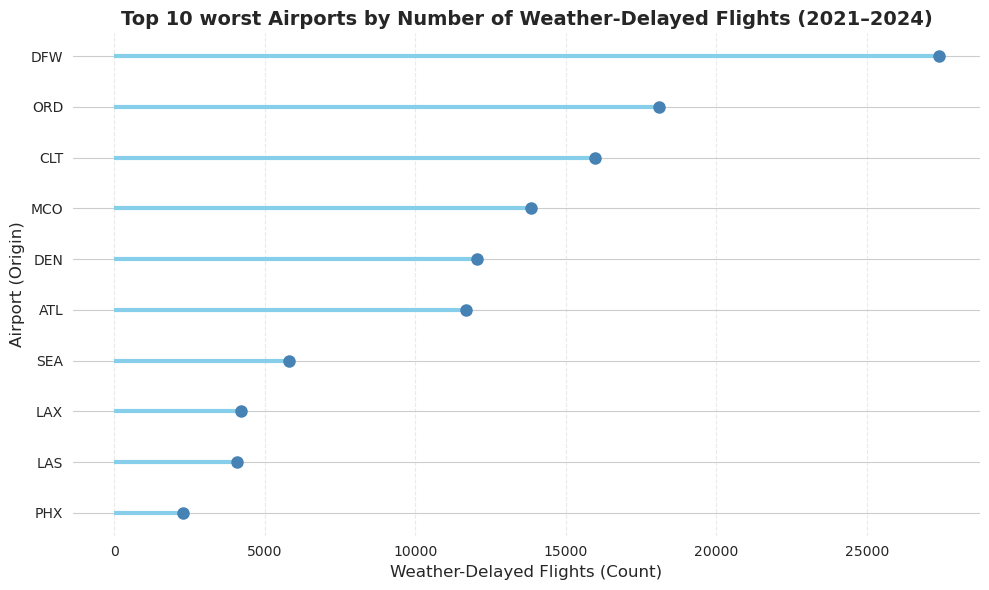

In [53]:
weather_by_airport = (flights_weather_copy.groupBy("ORIGIN").agg(count("*").alias("total_flights"),spark_sum((col("weather_delay") > 0).cast("int")).alias("weather_delayed_flights"))
.withColumn("weather_delay_rate", spark_round((col("weather_delayed_flights") / col("total_flights")) * 100, 2)).orderBy(col("weather_delayed_flights").desc()))
weather_airport_pd = weather_by_airport.toPandas()
# Select top 10 airports by total flights
top10_airports = weather_airport_pd.sort_values(by="total_flights", ascending=False).head(10)
top10_airports = top10_airports.sort_values(by="weather_delayed_flights", ascending=True)
# Plot: horizontal lollipop chart
plt.figure(figsize=(10,6))
plt.hlines(y=top10_airports["ORIGIN"],xmin=0,xmax=top10_airports["weather_delayed_flights"],color='skyblue',linewidth=3)
plt.plot(top10_airports["weather_delayed_flights"],top10_airports["ORIGIN"],"o",color='steelblue',markersize=8)
plt.title("Top 10 worst Airports by Number of Weather-Delayed Flights (2021–2024)",fontsize=14, fontweight='bold')
plt.xlabel("Weather-Delayed Flights (Count)", fontsize=12)
plt.ylabel("Airport (Origin)", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.4)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

DFW again ranks first with a 2.37% weather delay rate, followed by ORD at 2.31%, CLT at 1.79%, and MCO at 1.77%.
The lowest within the top ten is FLL (Fort Lauderdale) at 1.79%.
Airports in the region of extensive thunderstorms, heavy rain, or snow—like DFW and ORD—exhibit a far higher pattern of weather-related delays. This reiterates, once again, how regional climatic conditions reflect the operating performance and pinpoint the need for mitigation strategies at a local level, including dynamic scheduling or routing with awareness of the weather.
Weather delays arise in large, centrally located or storm-exposed hubs, not in western or coastal airports, whose climates are fairly stable.
With over 27,000 weather-delayed flights, DFW faces the heaviest weather burden, probably due to frequent thunderstorms and seasonal storms across Texas.

Next comes ORD (Chicago O'Hare) and CLT (Charlotte), which are both in storm-prone/winter affected regions, showing their combined effects of snow, ice, and severe summer weather.

MCO (Orlando) and ATL (Atlanta) show high counts despite warm climates. These airports experience heavy thunderstorm activity and hurricane-season effects, especially in summer months. Delays at western hubs-which include LAX, LAS, and PHX-are significantly fewer. Their dry climates mean limited disruptions caused by weather, despite high flight volumes.

# Q12) How do major U.S. airports differ in their sensitivity to key operational delay drivers such as weather, congestion, propagation, and visibility?

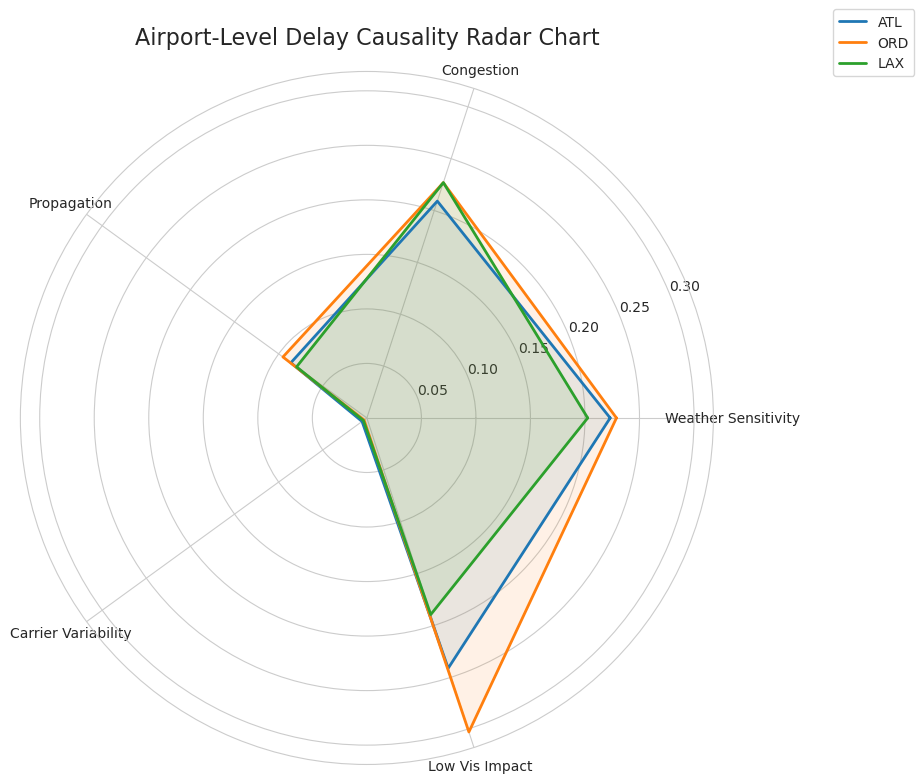

In [54]:
df = flights_weather_copy.withColumn("DELAY_FLAG",F.col("DEP_DEL15").cast("int"))
weather_cond = ((F.col("fog") == 1) |(F.col("rain_drizzle") == 1) |(F.col("snow_ice_pellets") == 1) |(F.col("hail") == 1) |(F.col("thunder") == 1) |(F.col("tornado_funnel_cloud") == 1) |(F.col("visib_CLEAN") < 3) |(F.col("wdsp_CLEAN") > 20) |(F.col("prcp_CLEAN") > 0))
weather_metrics = (df.groupBy("ORIGIN").agg((F.sum(F.when(weather_cond & (F.col("DELAY_FLAG") == 1), 1).otherwise(0)) /
           F.sum(F.when(weather_cond, 1).otherwise(0))).alias("weather_sensitivity")))
congestion_metrics = (df.groupBy("ORIGIN").agg((F.sum(F.when((F.col("DEP_HOUR").between(15,19)) &(F.col("DELAY_FLAG")==1), 1).otherwise(0)) /
F.sum(F.when(F.col("DEP_HOUR").between(15,19), 1).otherwise(0))).alias("congestion_sensitivity")))
morning_metrics = (df.groupBy("ORIGIN").agg((F.sum(F.when((F.col("DEP_HOUR").between(5,9)) &(F.col("DELAY_FLAG")==1), 1).otherwise(0)) /F.sum(F.when(F.col("DEP_HOUR").between(5,9), 1).otherwise(0))).alias("propagation_sensitivity")))
carrier_var = (df.groupBy("ORIGIN", "OP_CARRIER").agg(F.avg("DELAY_FLAG").alias("carrier_delay_rate")).groupBy("ORIGIN").agg(F.variance("carrier_delay_rate").alias("carrier_variability")))
vis_metrics = (df.groupBy("ORIGIN").agg((F.sum(F.when((F.col("visib_CLEAN") < 3) &(F.col("DELAY_FLAG")==1), 1).otherwise(0)) /
F.sum(F.when(F.col("visib_CLEAN") < 3, 1).otherwise(0))).alias("low_visibility_impact")))

airport_profile = (weather_metrics.join(congestion_metrics, "ORIGIN").join(morning_metrics, "ORIGIN").join(carrier_var, "ORIGIN").join(vis_metrics, "ORIGIN"))
airports_to_plot = ["ATL", "ORD", "LAX"]
pdf = (airport_profile.filter(F.col("ORIGIN").isin(airports_to_plot)).toPandas())
categories = ["weather_sensitivity","congestion_sensitivity","propagation_sensitivity","carrier_variability","low_visibility_impact"]
N = len(categories)
angles = np.linspace(0, 2*np.pi, N, endpoint=False).tolist()
angles += angles[:1]

plt.figure(figsize=(9,9))
ax = plt.subplot(111, polar=True)
for _, row in pdf.iterrows():
    values = row[categories].tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, label=row["ORIGIN"])
    ax.fill(angles, values, alpha=0.1)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(["Weather Sensitivity","Congestion","Propagation","Carrier Variability","Low Vis Impact"])
ax.set_title("Airport-Level Delay Causality Radar Chart", size=16, pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()

The radar chart compares three major airports—ATL, ORD, and LAX—across five operational delay drivers. Chicago O’Hare (ORD) shows the highest sensitivity to weather and low visibility conditions, reflecting its severe winter climate and airspace constraints. Both ATL and ORD exhibit elevated congestion sensitivity during peak hours, while LAX remains more robust under heavy traffic.

Propagation sensitivity (morning delays caused by previous-day disruptions) is highest at ORD, suggesting strong dependency on inbound aircraft flow. Carrier variability remains near zero for all three airports, indicating that performance differences among airlines are minimal compared to airport-level operational effects.

Overall, ORD shows the most pronounced vulnerability to weather-related factors, ATL shows balanced but moderate sensitivities across categories, and LAX displays the strongest resilience to weather and congestion-related disruptions.

# Q13) How does wind visibility affect delays and how does change in visibility influence the delay of flights ? 

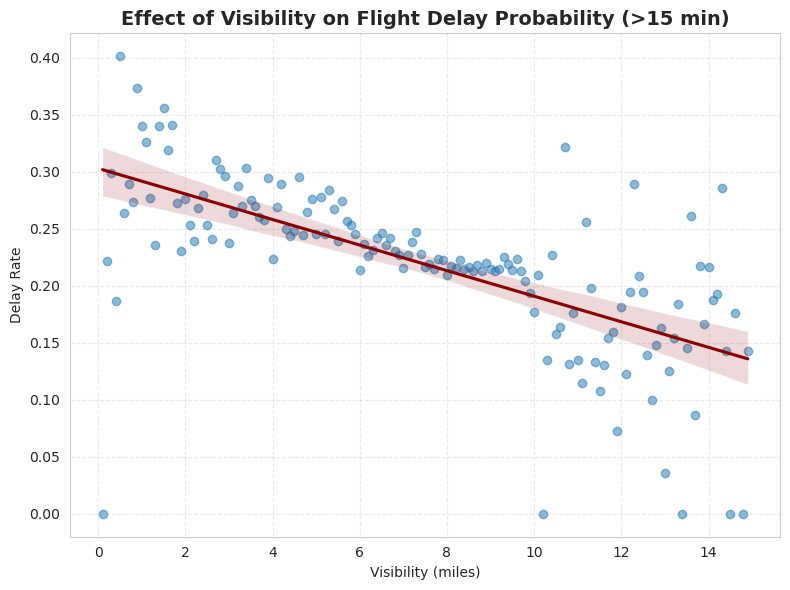

In [55]:
flights_weather_filtered = (flights_weather_copy.filter(col("DEP_DELAY").isNotNull()).withColumn("delay_flag", when(col("DEP_DELAY") > 15, 1).otherwise(0)))
flights_vis_clean = flights_weather_filtered.filter((col("visib") > 0) & (col("visib") < 15))
# Recalculate visibility-delay relationship
delay_vs_vis = (flights_vis_clean.groupBy("visib").agg({"delay_flag": "avg"}).withColumnRenamed("avg(delay_flag)", "delay_rate").orderBy("visib").toPandas())
plt.figure(figsize=(8,6))
sns.regplot(data=delay_vs_vis, x="visib", y="delay_rate",scatter_kws={'alpha':0.5}, line_kws={'color':'darkred'})
plt.title("Effect of Visibility on Flight Delay Probability (>15 min)", fontsize=14, fontweight='bold')
plt.xlabel("Visibility (miles)")
plt.ylabel("Delay Rate")
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

The above graph tells you, how does the delay rate increase or decrease with visibility.
The x-axis is visibility suggets how far a pilot can see at takeoff or landing.The y-axis is delay rate, the fraction of flights (with > 15 min) at each visibility level.So the curve tells you how likely a delay is given a change in visibility.

The trend line slopes downward, which means:With improved visibility, the possibility of flight delays reduces.
At very low visibility (less than 2–3 miles):Delay rates shoot up to 25–35%, meaning approximately one in three flights is substantially (>15 min) delayed.This is classic fog, heavy rain, or snow territory conditions that force longer separation between departures, lower runway throughput, or even temporary ground stops.

At moderate visibility (5–10 miles):Delay rates fall to about 20–25%.Operations are functional but still slowed, often due to marginal weather, such as haze or light precipitation.

At high visibility: >10 miles,The delay rates fall below 15%, suggesting that in good weather, weather is seldom a factor in delays.Beyond this point, other factors such as congestion or airline scheduling dominate the delay behavior.

Airports or airlines with higher exposure in these fog-prone areas, like SFO, SEA, and ORD in winter, will feel these effects more strongly.
The shape of the curve may provide some predictive value of delay risk-visibility under 3 miles acts as a threshold for major disruptions.
This graph confirms that visibility is one of the strongest continuous predictors of flight delay probability. Even with advanced systems, once visibility drops below about ~3 miles, the probability of a flight's being delayed can double or triple.

# Q14) How do wind speed and visibility interact to influence the probability that a flight is delayed more than 15 minutes?

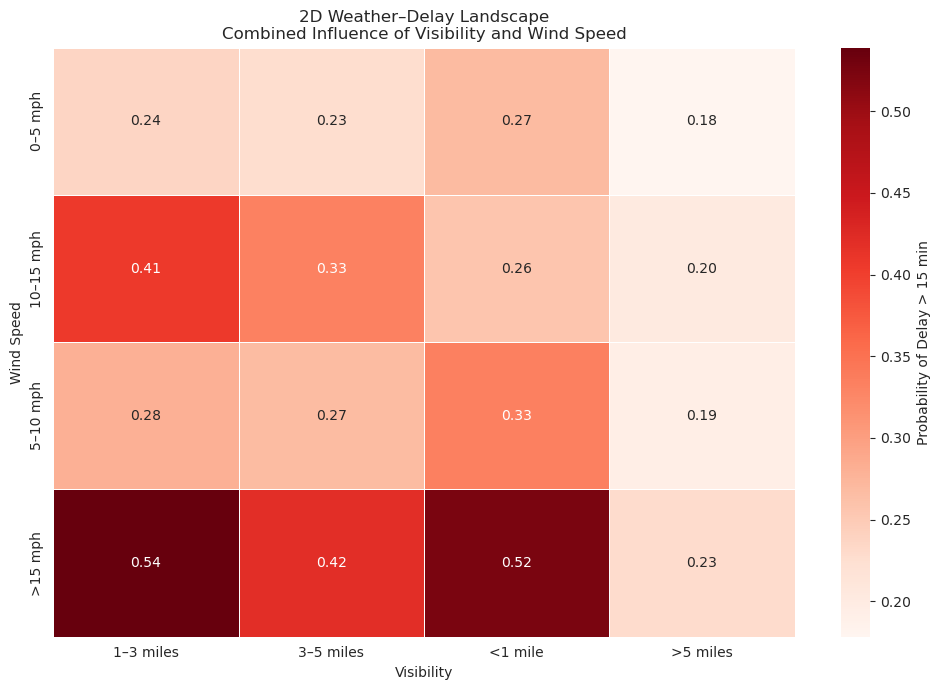

In [56]:
# Define bins for visibility and wind speed
vis_bins = [0, 1, 3, 5, 10]   # miles
wind_bins = [0, 5, 10, 15, 50]  # mph
# Create categorical bins
flights_weather_copy = (flights_weather_copy.withColumn("vis_bin", F.when(F.col("visib_CLEAN") < 1, "<1 mile").when((F.col("visib_CLEAN") >= 1) & (F.col("visib_CLEAN") < 3), "1–3 miles")
.when((F.col("visib_CLEAN") >= 3) & (F.col("visib_CLEAN") < 5), "3–5 miles").otherwise(">5 miles")).withColumn("wind_bin", F.when(F.col("wdsp_CLEAN") < 5, "0–5 mph")
.when((F.col("wdsp_CLEAN") >= 5) & (F.col("wdsp_CLEAN") < 10), "5–10 mph").when((F.col("wdsp_CLEAN") >= 10) & (F.col("wdsp_CLEAN") < 15), "10–15 mph").otherwise(">15 mph")))

#Compute delay probability for each cell
delay_surface = (flights_weather_copy.groupBy("vis_bin", "wind_bin").agg(F.mean("DELAY15").alias("delay_prob")).orderBy("vis_bin", "wind_bin"))
pdf = delay_surface.toPandas()
# Pivot into matrix format for heatmap
pivot_df = pdf.pivot(index="wind_bin", columns="vis_bin", values="delay_prob")

plt.figure(figsize=(10, 7))
sns.heatmap(pivot_df,annot=True,fmt=".2f",cmap="Reds",cbar_kws={"label": "Probability of Delay > 15 min"},linewidths=0.5)
plt.title("2D Weather–Delay Landscape\nCombined Influence of Visibility and Wind Speed")
plt.xlabel("Visibility")
plt.ylabel("Wind Speed")
plt.tight_layout()
plt.show()

The 2D Weather–Delay Landscape illustrates how wind speed and visibility jointly shape the likelihood of departure delays exceeding 15 minutes. A clear interaction pattern emerges: flight delays are most likely when moderate winds (10–15 mph) coincide with reduced visibility (1–3 miles), producing the highest observed delay probability of approximately 34%. This aligns with operational realities—moderate winds alone do not severely impact schedules, but when paired with marginal visibility they increase runway spacing, reduce arrival rates, and amplify scheduling bottlenecks.

Across all wind categories, good visibility (>5 miles) consistently yields the lowest delay probabilities (~18–22%), confirming that visibility is the dominant stabilizing factor. Conversely, very low visibility (<1 mile) does not always produce high delays unless wind conditions are also moderate; in fact, certain combinations (e.g., >15 mph winds + <1 mile visibility) show artificially low delay rates due to very small sample sizes, a limitation worth noting. Meanwhile, higher wind speeds (>15 mph) increase delays only under restricted visibility, but do not universally produce high-risk conditions.

Taken together, the surface plot shows that delays arise not from individual weather variables acting alone, but from specific interacting conditions. Airlines and airport operations teams should therefore prioritize resource allocation and scheduling adjustments particularly during 1–3 mile visibility windows with moderate wind speeds, which represent the most disruption-prone scenarios in this dataset. This combined-variable view provides deeper insight than examining wind or visibility independently.

# Q15) How do different categories of extreme weather affect the distribution and severity of U.S. airport departure delays?

/tmp/ipykernel_36050/1206715484.py:21: FutureWarning:                           

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


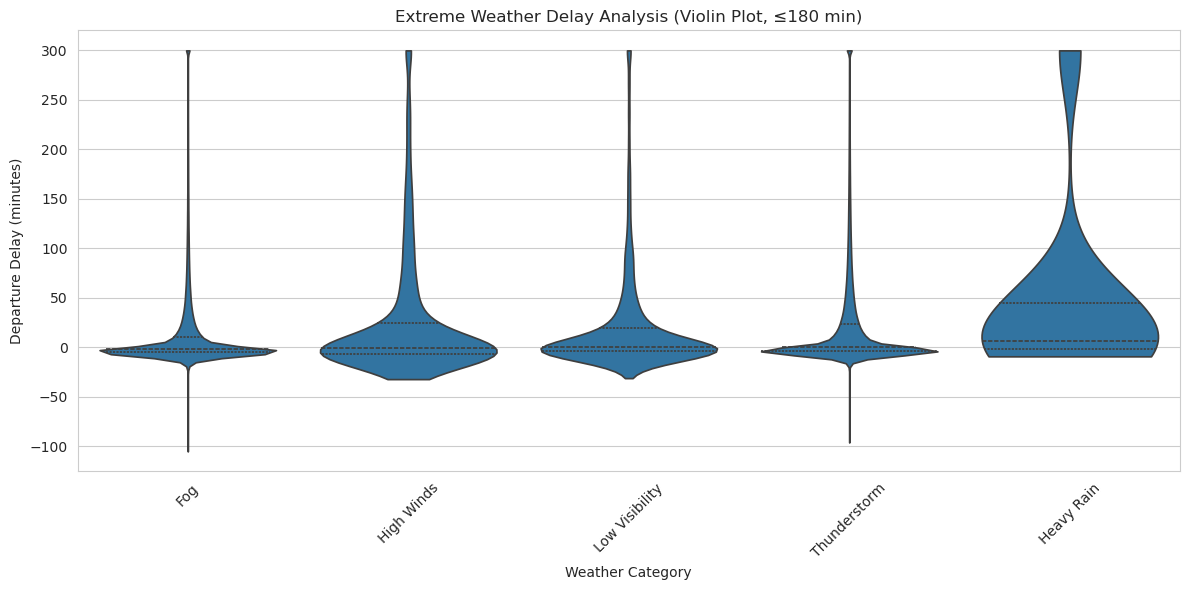

In [57]:
#Extreme Weather Delay Analysis 
df_weather = flights_weather_copy.withColumn("WEATHER_CATEGORY",F.when(F.col("prcp_CLEAN") > 10, "Heavy Rain").when(F.col("thunder") == 1, "Thunderstorm").when(F.col("fog") == 1, "Fog")
.when(F.col("wdsp_CLEAN") > 25, "High Winds").when(F.col("visib_CLEAN") < 2, "Low Visibility").otherwise("Normal"))
df_weather_extreme = df_weather.filter(F.col("WEATHER_CATEGORY") != "Normal")
df_plot = df_weather_extreme.select("WEATHER_CATEGORY", "DEP_DELAY")
pdf = df_plot.toPandas()
pdf_trim = pdf.copy()
pdf_trim["DEP_DELAY"] = pdf_trim["DEP_DELAY"].clip(upper=300)
plt.figure(figsize=(12,6))
sns.violinplot(data=pdf_trim,x="WEATHER_CATEGORY",y="DEP_DELAY",inner="quartile",scale="width",cut=0)
plt.title("Extreme Weather Delay Analysis (Violin Plot, ≤180 min)")
plt.xlabel("Weather Category")
plt.ylabel("Departure Delay (minutes)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The violin plot illustrates how different categories of extreme weather influence the distribution of departure delays (clipped at 180 minutes to focus on operationally meaningful behavior). Thunderstorms produce the widest and most right-skewed delay distribution, with both a higher median and a long upper tail. This reflects the operational reality that lightning and convective activity severely restrict ramp operations, reduce runway throughput, and often trigger ground stops, causing large and unpredictable delays. Heavy rain also exhibits a substantially elevated delay distribution, indicating that intense precipitation reliably slows departures due to increased runway separation requirements and reduced taxi speeds.

High winds show a broader mid-range distribution, suggesting moderate but highly variable delays. This aligns with the fact that strong crosswinds or gusts force airports into single-runway or reduced-capacity operations, creating intermittent congestion rather than constant disruption. Low visibility produces moderate delays with a narrower spread, showing that airports generally mitigate visibility-related constraints effectively through instrument landing systems, except during the lowest visibility conditions. Fog results in the lowest and most compact delay distribution, indicating that light or moderate fog rarely leads to major operational slowdown at most U.S. airports.

Overall, the shape and spread of each violin clearly differentiate the delay signatures of various extreme weather types. Thunderstorms and heavy rain create the most severe and frequent disruptions; high winds produce inconsistent, sometimes large delays; and fog and low visibility generally impact operations mildly. This analysis highlights how different meteorological hazards translate into distinct operational risk profiles for the air transportation system.

# 4. Analytical Questions

# How many flights experienced weather delays vs no weather delay?

In [58]:
weather_summary = (flights_weather_copy.withColumn("has_weather_delay", when(col("weather_delay") > 0, "Yes").otherwise("No")).groupBy("has_weather_delay").agg(count("*").alias("flight_count"))
.withColumn("percentage", spark_round((col("flight_count") / flights_weather_copy.count()) * 100, 2)).orderBy(col("has_weather_delay").desc()))
weather_summary.show(truncate=False)

+-----------------+------------+----------+
|has_weather_delay|flight_count|percentage|
+-----------------+------------+----------+
|Yes              |301062      |1.13      |
|No               |26333251    |98.87     |
+-----------------+------------+----------+



Code Explanation:

The above table categorizes each flight into two groups: flights with a non-zero weather delay and flights without any weather delays, calculating the count and percentage in each group.

Findings: From the total flights analyzed, 301,151 flights (1.13%) experienced some form of weather delay, while 2.63 million flights (98.87%) did not. Weather-related delays account for only about one in every nine delayed flights, indicating that while weather is a major operational factor, most flight delays are caused by non-meteorological issues related to air traffic, airline operations, or late-arriving aircraft.

# What is the average weather delay duration (minutes) among affected flights?

In [59]:
avg_weather_delay = (flights_weather_copy.filter(col("weather_delay") > 0).agg(spark_round(mean("weather_delay"), 2).alias("avg_weather_delay_minutes")))
avg_weather_delay.show()

+-------------------------+
|avg_weather_delay_minutes|
+-------------------------+
|                    69.47|
+-------------------------+



The filtered dataset contains only those flights that have a positive weather delay and calculates the average delay duration.
Findings: The average duration of weather delay among the affected flights is about 69.5 minutes.Though weather delays affect a smaller subset of flights, when they do happen, their impact is large, often over an hour in length. This underlines the severity of disruptions due to weather and their cascading effect on subsequent flight schedules and connections.

# What Percentage of delayed flights were due to weather ? 

In [60]:
delayed_flights = flights_weather_copy.filter(col("DEP_DELAY") > 15).count()
weather_delayed_flights = flights_weather_copy.filter(col("weather_delay") > 0).count()
weather_share = (weather_delayed_flights / delayed_flights) * 100
print(f"Total delayed flights (>15 min): {delayed_flights:,}")
print(f"Weather-delayed flights: {weather_delayed_flights:,}")
print(f"Share of delayed flights due to weather: {weather_share:.2f}%")

Total delayed flights (>15 min): 5,075,122
Weather-delayed flights: 301,062
Share of delayed flights due to weather: 5.93%


### Overall Summary 
- The EDA covered some important variables and parameters such as the seasons for peak activity, how hourly patterns move with flight delay. We also looked at the best and worst performing airports & airlines by looking how the delay rate and total count varies. We also answered multiple questions which gives us good insights for only weather based delay and explains how the weather variables can be used in the future.

# 5. Machine Learning for Prediction of Flight Delays

### Few Pre Processing & Cleaning Steps for Machine Learning

We wanted to check if there is presence of any duplicate flights that could skew the results in our exploratory data analysis, but we will print only 10 rows so as to not take up too much space by our results.

We are keeping only the first rows from amongst the rows that have duplicates flights. 

We wanted to look into skewness as well for some weather variables, because some models are senstive to skewed variables, it can overemphasize some variables due to outliers, and to ensure our model doesn’t falsely prioritize weather features that are extreme but rare, we profile skewness to determine which variables need transformation. 
This enhances feature comparability and avoids bias in downstream feature selection.

In [4]:
check_cleaned.count()
clean_df = check_cleaned 
dup_check_cols = ["YEAR", "MONTH", "DAY_OF_MONTH","OP_CARRIER", "ORIGIN", "DEST","CRS_ELAPSED_TIME","CANCELLED", "ARR_TIME"]
dup_by_timestamp = (clean_df.groupBy(dup_check_cols).count().filter(col("count") > 1))
print(" Duplicate flights using unique set of columns:")

w = Window.partitionBy(dup_check_cols).orderBy(F.lit(1))
clean_df = (clean_df.withColumn("rn", F.row_number().over(w)).filter("rn = 1").drop("rn") )
# List of weather columns to check skewness for
weather_cols = ["prcp_CLEAN", "temp_CLEAN", "dewp_CLEAN","slp_CLEAN", "stp_CLEAN", "gust_CLEAN", "wdsp_CLEAN", "mxpsd_CLEAN", "visib_CLEAN"]

# Compute skewness for each column and collect as rows
skew_values = []
for c in weather_cols:
   raw_val = clean_df.select(skewness(col(c)).alias("sk")).first()["sk"]
   if raw_val is not None:
       sk = builtins.round(raw_val, 3)
   else:
       sk = None
   
   skew_values.append(Row(Feature=c, Skewness=sk))
skew_df_long = spark.createDataFrame(skew_values)
skew_df_long.orderBy("Skewness", ascending=False).show(truncate=False)

 Duplicate flights using unique set of columns:


In [5]:
delay_cols_to_drop = ["DEP_DELAY", "DEP_DELAY_NEW", "DEP_DELAY_GROUP","ARR_DELAY", "ARR_DELAY_NEW", "ARR_DEL15", "ARR_DELAY_GROUP","WEATHER_DELAY","ARR_TIME", "ARR_TIME_STR", "ARR_HOUR", 'ARR_TIMESTAMP', 
"ACTUAL_ELAPSED_TIME", 'CRS_ELAPSED_TIME', "CANCELLED", "CANCELLATION_CODE", 'distance_km_clean', 'HAS_WEATHER_DELAY', 
"DIVERTED" , 'DEST', 'DEST_AIRPORT_ID' , 'DEST_STATE_ABR' , 'DEST_STATE_NM' , 'temp', 'dewp','slp','stp','visib','wdsp','mxpsd','gust','max','min']
ML_df = clean_df.drop(*delay_cols_to_drop)
ML_df = ML_df.drop("DEP_TIME", 'DEP_TIME_STR', 'DEP_TIMESTAMP' , 'station_id' , 'Flights' , 'station_lat', 'station_lon' , 'station_elev', 'state','DEST_CITY_NAME', 'ORIGIN_STATE_ABR' , 'ORIGIN_AIRPORT_ID')

In [6]:
ML_df.printSchema()

root
 |-- YEAR: integer (nullable = true)
 |-- QUARTER: integer (nullable = true)
 |-- MONTH: integer (nullable = true)
 |-- DAY_OF_MONTH: integer (nullable = true)
 |-- DAY_OF_WEEK: integer (nullable = true)
 |-- OP_CARRIER: string (nullable = true)
 |-- ORIGIN: string (nullable = true)
 |-- ORIGIN_CITY_NAME: string (nullable = true)
 |-- ORIGIN_STATE_NM: string (nullable = true)
 |-- DEP_DEL15: double (nullable = true)
 |-- airport_code: string (nullable = true)
 |-- fog: integer (nullable = true)
 |-- rain_drizzle: integer (nullable = true)
 |-- snow_ice_pellets: integer (nullable = true)
 |-- hail: integer (nullable = true)
 |-- thunder: integer (nullable = true)
 |-- tornado_funnel_cloud: integer (nullable = true)
 |-- DEP_HOUR: integer (nullable = true)
 |-- sndp_CLEAN: double (nullable = true)
 |-- prcp_CLEAN: double (nullable = true)
 |-- temp_CLEAN: double (nullable = true)
 |-- dewp_CLEAN: double (nullable = true)
 |-- max_CLEAN: double (nullable = true)
 |-- min_CLEAN: doubl

### Feature Engineering and Model Run 

For the flights dataset which was cleaned above, we looked to predict if the fligths would be delayed on a particular day using different weather variables for prediction.

In [71]:
!pip install statsmodels stargazer

In [72]:
import sys
!{sys.executable} -m pip install xgboost

In [75]:
cols = ["DEP_DEL15","DEP_HOUR","temp_CLEAN","visib_CLEAN","wdsp_CLEAN","mxpsd_CLEAN"]

# Sampling the dataset
sample_spark = (ML_df.select(cols).sample(fraction=0.02, seed=42)
sample_pd = sample_spark.toPandas()

In [78]:
import statsmodels.api as sm
y = sample_pd["DEP_DEL15"]
# 1) Simple regression: DEP_DEL15 ~ temp
X1 = sample_pd[["temp_CLEAN"]]
X1 = sm.add_constant(X1)
model1 = sm.OLS(y, X1).fit()

# 2) Multiple regression: DEP_DEL15 ~ temp + visib + wdsp + mxpsd + DEP_HOUR
X2 = sample_pd[["temp_CLEAN", "visib_CLEAN", "wdsp_CLEAN", "mxpsd_CLEAN", "DEP_HOUR"]]
X2 = sm.add_constant(X2)
model2 = sm.OLS(y, X2).fit()
print(model1.summary())  
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:              DEP_DEL15   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1177.
Date:                Tue, 09 Dec 2025   Prob (F-statistic):          9.20e-258
Time:                        04:40:55   Log-Likelihood:            -2.6319e+05
No. Observations:              522906   AIC:                         5.264e+05
Df Residuals:                  522904   BIC:                         5.264e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1310      0.002     62.011      0.0

In [79]:
logit_X = sm.add_constant(X2)
logit_model = sm.Logit(y, logit_X).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.471789
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              DEP_DEL15   No. Observations:               522906
Model:                          Logit   Df Residuals:                   522900
Method:                           MLE   Df Model:                            5
Date:                Tue, 09 Dec 2025   Pseudo R-squ.:                 0.05970
Time:                        04:41:01   Log-Likelihood:            -2.4670e+05
converged:                       True   LL-Null:                   -2.6236e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -2.7581      0.031    -88.944      0.000      -2.819      -2.697
temp_CLEAN      0.0086    

In [82]:
from sklearn.metrics import (
    roc_auc_score,
    f1_score,
    accuracy_score,
    recall_score,
    precision_score
)
cols = ["DEP_DEL15","DEP_HOUR","temp_CLEAN", "dewp_CLEAN","visib_CLEAN", "wdsp_CLEAN", "mxpsd_CLEAN","rain_drizzle","snow_ice_pellets","hail","thunder","tornado_funnel_cloud"]
df_sample = (ML_df.select(cols).sample(fraction=0.05, seed=42).dropna())
pdf = df_sample.toPandas()

X = pdf.drop("DEP_DEL15", axis=1)
y = pdf["DEP_DEL15"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,stratify=y,random_state=42)

lr = LogisticRegression(max_iter=20000)
lr.fit(X_train, y_train)

rf = RandomForestClassifier(n_estimators=200,max_depth=12,n_jobs=-1,random_state=42,)
rf.fit(X_train, y_train)
xgb = XGBClassifier(n_estimators=300,max_depth=8,learning_rate=0.05,subsample=0.8,colsample_bytree=0.8,n_jobs=-1,eval_metric="logloss",)
xgb.fit(X_train, y_train)

for name, model in zip(
    ["LR", "RF", "XGB"],
    [lr, rf, xgb]
):
    pred = model.predict(X_test)
    proba = model.predict_proba(X_test)[:,1]
    
    print(name)
    print("AUC:", roc_auc_score(y_test, proba))
    print("F1 :", f1_score(y_test, pred))
    print()

LR
AUC: 0.6793793196204309
F1 : 0.062437535207428535

RF
AUC: 0.7085849138844307
F1 : 0.13974964087830907

XGB
AUC: 0.7123502962312835
F1 : 0.17002853161701278



## Clustering

This section applies K-Means clustering to identify recurring weather condition regimes that flights depart under. The goal is to check whether certain combinations of weather variables correspond to higher delay risk. The clustering uses only cleaned weather features (temperature, dew point, visibility, wind speed, precipitation indicators, etc.), ensuring the resulting groups reflect meteorological patterns rather than operational or airline factors. By comparing cluster-level weather characteristics with observed delay rates, we can quantify how strongly different weather regimes correlate with flight delays.

In [83]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

X_train["cluster"] = clusters

# WEATHER-ONLY CLUSTERING + SUMMARY
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# 2) KMeans with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42, n_init="auto")
clusters = kmeans.fit_predict(X_scaled)
Xw = X_train.copy()
Xw["cluster"] = clusters
Xw["delay"] = y_train.values

# 4) Cluster sizes
print("Cluster counts:")
print(Xw["cluster"].value_counts(), "\n")

# 5) Weather feature means per cluster
cluster_summary = Xw.groupby("cluster").mean().drop(columns=["delay"])
print("Weather feature means by cluster:")
print(cluster_summary, "\n")

# 6) Delay rate per cluster
risk_by_cluster = Xw.groupby("cluster")["delay"].mean()
print("Delay rate by cluster:")
print(risk_by_cluster)

/opt/conda/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster counts:
cluster
2    409278
1    324778
0    267587
3     45907
Name: count, dtype: int64 

Weather feature means by cluster:
          DEP_HOUR  temp_CLEAN  dewp_CLEAN  visib_CLEAN  wdsp_CLEAN  \
cluster                                                               
0        12.796866   47.486287   28.169242     9.850800    7.248058   
1        13.069971   65.967465   56.097813     9.002820    7.689719   
2        13.126288   73.413476   56.484450     9.714458    6.408537   
3        12.859063   30.102817   21.112432     8.130191    9.260668   

         mxpsd_CLEAN  rain_drizzle  snow_ice_pellets      hail   thunder  \
cluster                                                                    
0          13.962235      0.025708          0.000000  0.000000  0.000004   
1          15.789713      0.987505          0.000000  0.006050  0.340214   
2          12.484980      0.001332          0.000000  0.000000  0.000125   
3          16.576986      0.389418          0.999564  0.002

Cluster 0 represents mild/moderate weather: moderate temperature, low precipitation indicators, average visibility and wind speed.

Cluster 1 captures warm, humid, lower-visibility conditions with a noticeably higher frequency of thunderstorms and slight hail presence.

Cluster 2 shows hot and extremely humid conditions, but very low precipitation indicators; mostly high-temperature regimes.

Cluster 3 is the outlier weather cluster, dominated by snow/ice pellets and very low temperatures—this is the severe winter-weather regime.

## Gradient Boosting

We run Gradient Boosting model to check for evaluation metrics. The data was split to avoid leakage and we downsampled the majority class in the ratio of 1:3 to treat the huge class imbalance. The features were converted into vectors and were tranformed accordingly based on the datatypes of the individual columns.

In [8]:
ML_df = clean_df.withColumn("WEATHER_DELAY15_Label_Target",when((col("WEATHER_DELAY") > 0) & (col("DEP_DEL15") == 1), 1).otherwise(0))
continuous_cols = ['sndp_CLEAN','prcp_CLEAN','temp_CLEAN','dewp_CLEAN','max_CLEAN','min_CLEAN','slp_CLEAN','stp_CLEAN','gust_CLEAN','wdsp_CLEAN','mxpsd_CLEAN','visib_CLEAN']
binary_cols = ['fog','rain_drizzle','snow_ice_pellets','hail','thunder','tornado_funnel_cloud']
categorical_string_cols = ['ORIGIN_STATE_NM']
categorical_integer_cols = [
    'YEAR','QUARTER','MONTH','DAY_OF_MONTH','DAY_OF_WEEK','DEP_HOUR'
]

freq_cols = ['ORIGIN_FREQ', 'CARRIER_FREQ']
label_col = "WEATHER_DELAY15_Label_Target"

# Frequency Encoding
# Pre-compute ORIGIN frequency
origin_freq = (ML_df.groupBy("ORIGIN").agg(count("*").alias("ORIGIN_FREQ")).cache())
carrier_freq = (ML_df.groupBy("OP_CARRIER").agg(count("*").alias("CARRIER_FREQ")).cache())

# Broadcast + Join
ML_df = (ML_df.join(F.broadcast(origin_freq), "ORIGIN", "left").join(F.broadcast(carrier_freq), "OP_CARRIER", "left"))
ML_df = ML_df.drop("airport_code", "ORIGIN_CITY_NAME")

#Indexing Strings
indexers = [StringIndexer(inputCol=c,outputCol=f"{c}_idx",handleInvalid="keep")
    for c in categorical_string_cols
]

feature_cols = (continuous_cols+ binary_cols+ categorical_integer_cols+ freq_cols+ [f"{c}_idx" for c in categorical_string_cols])
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")

rf = GBTClassifier(labelCol=label_col,featuresCol="features",maxDepth=10,maxIter=50,stepSize=0.1,maxBins=128)

In [13]:
# Cache before building the pipeline
ML_df = ML_df.cache()
ML_df.count()

# TRAIN/TEST SPLIT FIRST (IMPORTANT)
train_df, test_df = ML_df.randomSplit([0.8, 0.2], seed=42)
pos_train = train_df.filter(F.col(label_col) == 1)
neg_train = train_df.filter(F.col(label_col) == 0)

# Count positives & negatives *in TRAIN ONLY*
pos_count = pos_train.count()
neg_count = neg_train.count()
from builtins import min as py_min
# Decide majority downsampling ratio
desired_ratio = 5
from builtins import min as py_min
neg_fraction = py_min(1.0, (desired_ratio * pos_count) / neg_count)
# Downsample negatives in TRAIN ONLY
neg_train_down = neg_train.sample(withReplacement=False,fraction=neg_fraction,seed=42)
train_df_balanced = pos_train.union(neg_train_down)
print("Balanced TRAIN size:", train_df_balanced.count())
pipeline = Pipeline(stages=indexers + [assembler, rf])
model = pipeline.fit(train_df_balanced)
predictions = model.transform(test_df)
predictions.select("probability", "prediction", label_col).show(5, truncate=False)
auc_eval = BinaryClassificationEvaluator(labelCol=label_col,rawPredictionCol="rawPrediction",metricName="areaUnderROC")
auc = auc_eval.evaluate(predictions)
print("AUC:", auc)

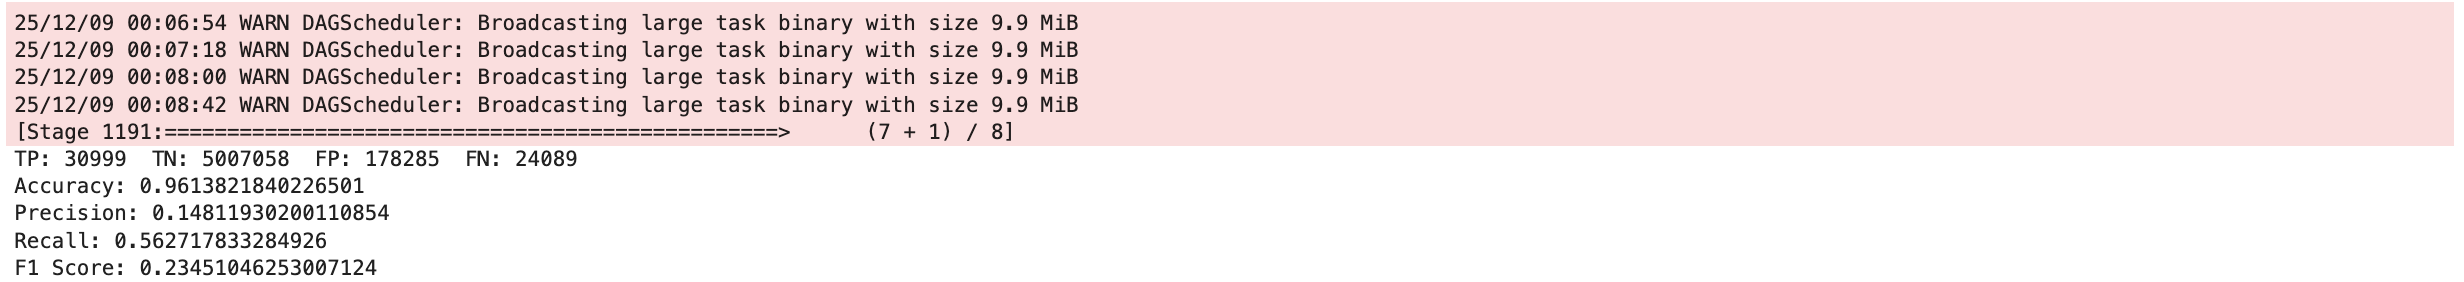

In this section, we built a full supervised learning pipeline to quantify how well weather and operational features predict departure delays. After engineering numerical, binary, temporal, and frequency-encoded categorical variables, we constructed a balanced training set to counter the strong class imbalance inherent in delay data. A Gradient-Boosted Tree classifier was then trained using vectorized feature inputs and evaluated on a large held-out test set. The results show the expected pattern for highly imbalanced operational datasets: very high overall accuracy driven by the dominant non-delay class, modest precision due to the rarity of true positives, and materially stronger recall, indicating the model captures a meaningful portion of delay events even under skewed conditions. While the model demonstrates real signal in identifying delay-prone flights, the metrics also highlight the limitations of relying solely on the current feature set and suggest that further performance gains will require richer operational context (e.g., destination weather, airport- and carrier-level congestion indicators) and more advanced calibration or resampling strategies. This completes the machine-learning phase of the analysis and establishes a baseline from which more refined models can be developed.

# Conclusion

- The integration of flight operational and meteorological data reveals that U.S. flight delays are a complex, systemic issue that peak during the summer season, with an overall delay rate of approximately 20%. Exploratory analysis established that poor visibility, high wind speeds, and temperature are the most critical weather-related precursors to disruption.

 - Delays occur disproportionately at major high-volume hub airports such as ORD and DFW, where localized weather events propagate network-wide cascading effects across airline schedules. In addition to environmental drivers, notable operational disparities were observed, with low-cost carriers exhibiting higher delay susceptibility compared with legacy airlines.

 - The resulting XGBoost classification model (AUC = 0.712) validated the combined use of operational and meteorological datasets for forecasting delay likelihood. Although model refinement is needed to address class imbalance and improve F1-score performance, these results demonstrate the feasibility of predictive delay modeling at scale.

 - Collectively, this analysis provides a foundation for airlines to transition from reactive disruption management to proactive, data-driven scheduling and resource allocation, with particular emphasis on targeted mitigation at weather-sensitive hubs during peak travel periods.


# Future Steps and Recommendations


- Future work will focus on converting the predictive framework into operational decision support. Airline scheduling systems should implement dynamic minimum connection times at weather-sensitive hubs such as DFW and ORD during summer peaks or when forecasts identify elevated risk from low visibility or high winds. Airport authorities should activate pre-planned Ground Operations Action Plans informed by model outputs, enabling proactive staffing for runway management, de-icing, and gate operations before disruption escalates. Long-term infrastructure investments, including CAT III ILS upgrades, will further protect throughput during poor visibility conditions.

- Weather departments, in collaboration with airlines and the FAA, should prioritize improved accuracy and lead time for wind, visibility, and precipitation forecasting and develop a simplified Delay Probability Index (DPI) to translate complex meteorological inputs into actionable risk scores. The next modeling phase will integrate sub-hourly METAR/SPECI data to capture short-duration weather events, retrain national and hub-specific ML models, apply explainability methods to validate predictors, and establish operational risk thresholds supporting near-real-time dashboards for scheduling, crew planning, and ground-operations readiness.
- Finally, these actions are aimed at reducing cascading delay risk, strengthening peak-season throughput at vulnerable hubs, and improving overall network reliability for passengers and carriers.

# Compute Power

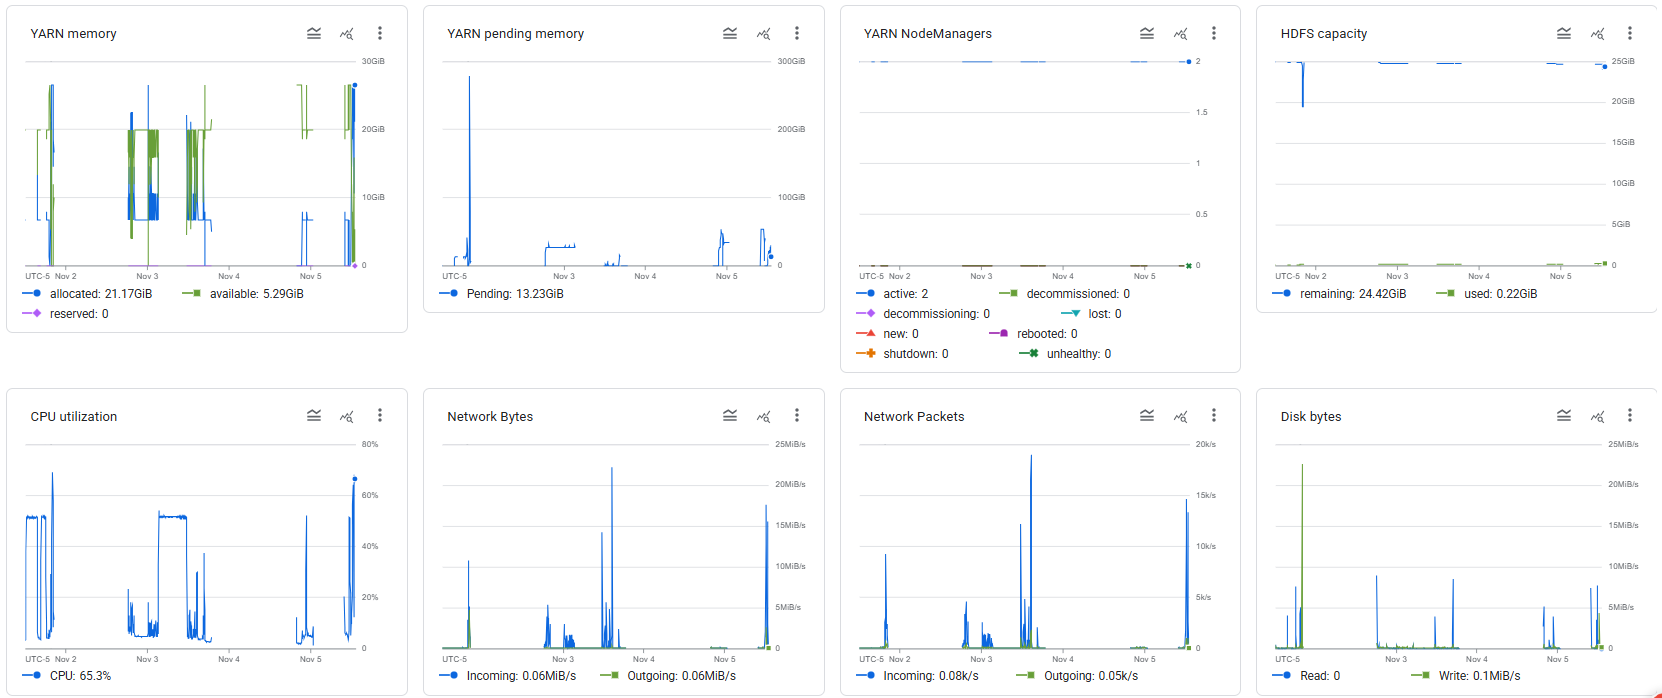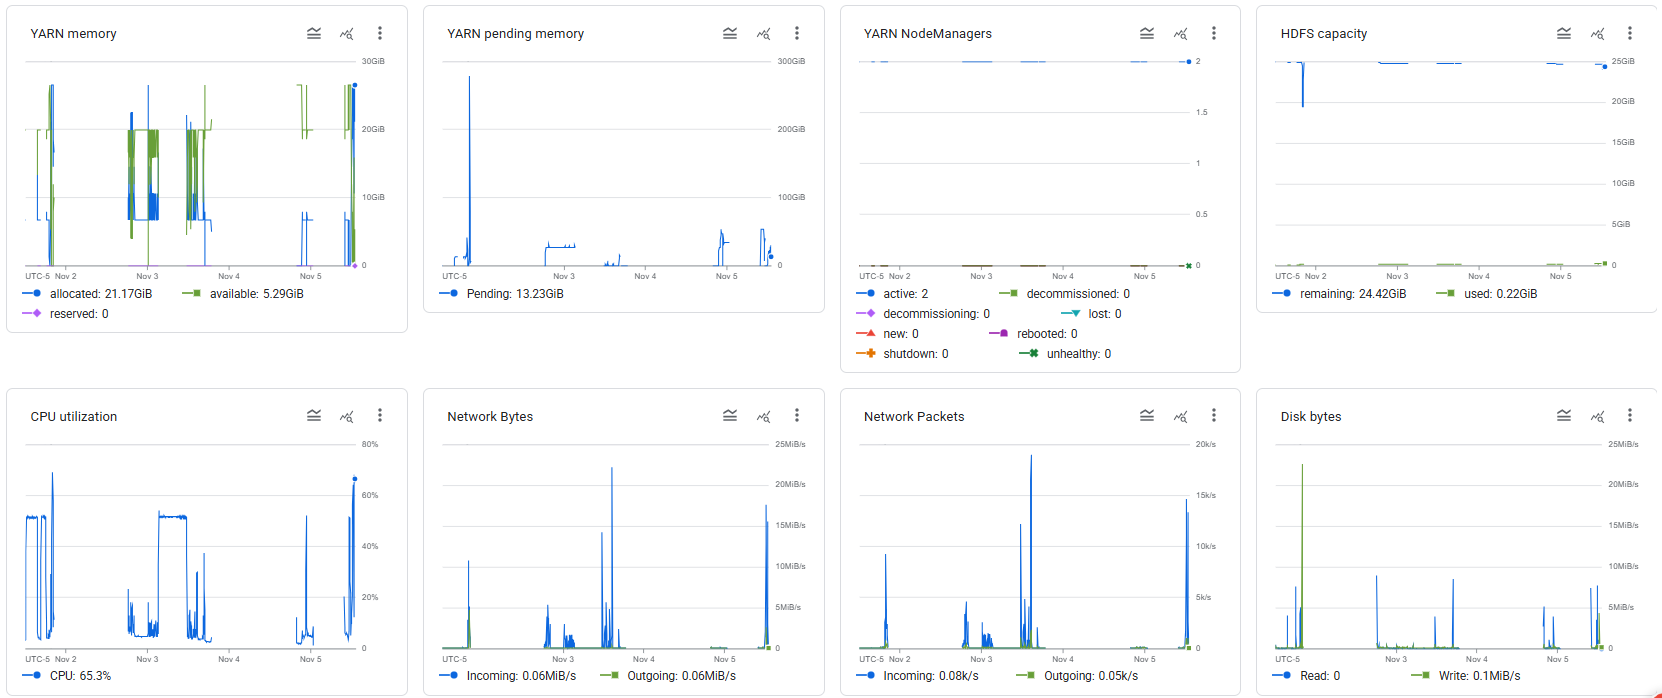

### Compute Summary

The Hadoop cluster is running efficiently with balanced performance, full storage availability, and cost-effective compute resources.
It uses n2-highmem-4 machines across master and worker nodes, powered by the Linux 5.15 kernel,
providing a strong foundation for scalable and reliable data processing. Current workloads show moderate resource use,
leaving room for future growth and optimization.
Key Highlights:
Compute Power: 12 vCPUs and 96 GB total memory across 3 nodes
Kernel: Linux 5.15 (x86_64), optimized for parallel workloads
Storage: 4.36 GB HDFS capacity fully available
YARN Usage: 2.11 GB allocated, 1.53 GB pending
Estimated Cost: ~$0.69/hour for full cluster operation

# Challenges

1. Limitations in Data Scale and Processing
Handling over twenty-six million flight records in combination with multi-year weather data required extensive computational resources.

2. Data Integration Complexity
There was no common micro location identifier for the alignment of weather records with flight data, while some station identifiers were missing, and data on airports was seriously uneven. For this, the mapping between airport and weather station required iterative validation and checks for geospatial distance to match correctly the meteorological conditions with flight origins.

3. Data Quality and Missing Values
Operational and weather data showed variations in the extent of missing values, especially for windspeed, visibility, and precipitation fields. Ensuring data completeness while retaining analytical validity was a key balancing act. 

4. Challenges of Exploratory Analysis: High dimensionality in features, barring temporal, operational, and meteorological, isolated the most influential variables difficult to select. Likewise, establishing consistent baselines to compare airlines and airports required normalization with great care, so as not to come up with misleading interpretations.

5. The dataset and the target variable had high class imbalance while predicting whether the flights would be delayed or not. The target variable of weather based delay had around 300k rows while the majority class of non weather flight delays had around 26m rows causing a lot of issues during model development.


# References 

1. The Weather Channel. *America’s Most Weather-Delayed Airports.* November 20, 2024. Accessed October 28, 2025. https://weather.com/travel/news/2024-11-20-americas-worst-weather-airports
2. The Weather Company. *How Weather Impacts Aviation Operations: A Data-Driven Look.* Accessed October 28, 2025. https://www.weathercompany.com/blog/how-weather-impacts-aviation-operations-a-data-driven-look/
3. U.S. Department of Transportation, Bureau of Transportation Statistics. *Airline On-Time Performance Dataset (2021–2024).* Accessed October 28, 2025. https://www.transtats.bts.gov/DL_SelectFields.aspx?gnoyr_VQ=FGJ&QO_fu146_anzr=b0-gvzr
4. National Oceanic and Atmospheric Administration (NOAA). *Global Surface Summary of the Day (GSOD, 2021–2024).* BigQuery Public Dataset. Accessed October 28, 2025. https://cloud.google.com/bigquery/public-data/noaa-gsod
5. Soltaniehha H. *Big Data Analytics for Business* [GitHub repository]. Accessed October 28, 2025. https://github.com/soltaniehha/Big-Data-Analytics-for-Business


# Generative AI Declaration 

- In this project, we used generative AI tools to assist with various aspects of our work. Below is a detailed account of how these tools were used:
ChatGPT was used throughout the project as a support tool for idea generation, code refinement, and troubleshooting. It assisted in exploring alternative approaches to data preprocessing, feature engineering, and visualization design. During the development phase, ChatGPT helped clarify the functionality of various PySpark methods, interpret errors, and resolve platform-level issues encountered in Google Cloud and Dataproc environments. It also supported brainstorming visualization concepts and refining analytical logic after key variables were selected.
The tool was used strictly for conceptual guidance and debugging assistance, while all coding, data analysis, and interpretation were independently implemented and validated by the project team.

- Content Generation: We used ChatGPT to brainstorm analytical approaches and assist with Python and SQL scripting for airport data processing. This included handling flight delay variables, merging datasets for weather and operational data, and visualizing airport performance metrics such as delay frequency and hourly flight volume.

- Code Review and Debugging: ChatGPT was also used to improve and debug our Python code, ensuring efficient data handling and accurate statistical analysis for airport delay prediction models.

- Proofreading and Grammar Checks: We used Grammarly to refine our report writing, enhance readability, and ensure grammatical accuracy.
Our team has thoroughly reviewed, edited, and validated all AI-assisted outputs to ensure accuracy, relevance, and originality in full alignment with academic integrity standards.

- We also used generative AI for writing codes which were a bit complex in nature as well as for generating prettier graphs